##Name: Salah Eslim
##student id: st20313374



##Github repo:https://github.com/salaheslim/Salah-Beijing-Airpollution-app.git

##stremlit app:https://salah-beijing-airpollution-app-pxdkfcgqxxrajj5duzse7x.streamlit.app/

Module Code: CMP7005
Module Title: Programming for Data Analysis
Academic year:2024-2025

Air pollution Analysis

Mitigate air pollution through the forecasting of air quality in Beijing (capital of China)

This project analyzes hourly air quality data from 12 monitoring stations in Beijing, spanning 2013 to 2017. It includes both pollutant measurements (PM2.5, PM10, SO2, NO2, CO, O3) and meteorological conditions (wind speed, rainfall, temperature, dew point, and pressure). The goal is to apply programming-driven techniques to process and analyze the data, solving real-world problems while utilizing version control and collaboration tools for effective workflow management.

###Task 1 : Data Handling

To handle the data we have to do some process








1- import necessary libraries that i work on it.

2- Import, select and merge data.

3- site type classification (categorize the station by type as requested ((urban, suburban, rural, industrial)

5- Saves the updated dataset with the site type information

Import the necessary libraries.

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os
import glob
import random
import joblib
import warnings
warnings.filterwarnings('ignore')


2- Import select and merge data.

In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
%cd '/content/drive/MyDrive/data sets/Merged cities '

/content/drive/MyDrive/data sets/Merged cities 


In [210]:
%ls

analyzed_data/
analyzed_data.csv
app.py
merged_data.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
random_forest_pm25_model.joblib


The dataset is chosen based on parameters such as urban, industrial, rural, and suburban because these classifications reflect significant variations in air pollution sources, atmospheric conditions, and human activities.

1.	Dongsi (Urban):located in central BeijingIt -densely populated where traffic and residential pollution are significant contributors to air quality.significant contributors to air pollution due to vehicle emissions, construction activities, and heating systems. urban air quality helps understand pollution exposure in densely populated areas and assess health risks.
2.	Changping (Suburban):Changping is situated on the outskirts of Beijing and is considered a suburban area.It represents the transitional zone between urban and rural areas, where the impact of urban sprawl and moderate industrial activity can be observed.These areas are hotspots for pollutants like SO2, PM10, and NO2, often resulting from factory emissions and industrial processes.industrial data helps in identifying the impact of manufacturing and energy production on air quality.
3.	Dingling (Rural):Dingling is located in northern Beijing, characterized by its rural environment.It serves as a benchmark for areas with minimal industrial activity and lower levels of urban pollution, often influenced by natural sources or long-range transport of pollutants.Pollution in these areas may come from agricultural activities, natural sources, or long-range transport of pollutants from urban and industrial areas.
Studying rural air quality provides a baseline to compare with urban and industrial sites and understand regional pollution dynamics.
4.	Shunyi (Industrial) (Updated Selection):Shunyi is a prominent industrial area in Beijing, known for its manufacturing and industrial activities.It is selected to represent sites with significant industrial emissions, highlighting the impact of factories and industrial processes on air quality. lie between urban and rural regions and often experience a mix of urban and rural pollution sources.
Suburban areas are influenced by urban sprawl, moderate industrial activity, and transportation emissions.
Including suburban data helps in understanding the transitional impact of urbanization on air quality.


3- Define the dataset file paths to merge it

In [211]:
df1 = pd.read_csv('/content/drive/MyDrive/data sets/Merged cities /PRSA_Data_Shunyi_20130301-20170228.csv')
df2= pd.read_csv('/content/drive/MyDrive/data sets/Merged cities /PRSA_Data_Changping_20130301-20170228.csv')
df3= pd.read_csv('/content/drive/MyDrive/data sets/Merged cities /PRSA_Data_Dingling_20130301-20170228.csv')
df4= pd.read_csv('/content/drive/MyDrive/data sets/Merged cities /PRSA_Data_Dongsi_20130301-20170228.csv')
df=pd.concat([df1,df2,df3,df4],ignore_index=True)
df.to_csv('/content/drive/MyDrive/data sets/Merged cities /merged_data.csv', index=False)
print("Merged dataset saved as 'merged_dataset.csv'.")

Merged dataset saved as 'merged_dataset.csv'.


4- Read the Merged Dataset

In [212]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       140256 non-null  int64  
 1   year     140256 non-null  int64  
 2   month    140256 non-null  int64  
 3   day      140256 non-null  int64  
 4   hour     140256 non-null  int64  
 5   PM2.5    137040 non-null  float64
 6   PM10     137917 non-null  float64
 7   SO2      136939 non-null  float64
 8   NO2      135389 non-null  float64
 9   CO       131348 non-null  float64
 10  O3       136285 non-null  float64
 11  TEMP     140079 non-null  float64
 12  PRES     140085 non-null  float64
 13  DEWP     140076 non-null  float64
 14  RAIN     140083 non-null  float64
 15  wd       139415 non-null  object 
 16  WSPM     140112 non-null  float64
 17  station  140256 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 19.3+ MB


In [214]:
print("\nFirst 5 rows of the dataset with site types:")
print(df.head())



First 5 rows of the dataset with site types:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi  


- READ AND VISUALIZ DATA

Display basic information before modification

 site type classification (categorize the station by type as requested ((urban, suburban, rural, industrial) and check if there is any douplication

#**Task 2:Exploratory Data Analysis (EDA)**

### TAsk2    a) Fundamental data understanding



 Understanding data need  to know the following point:



*   load the data to do analysis on it

*   Number of rows and columns

*   Values in the data (first few rows)
*   Data types
*   List item


*   List item



2-Data types of each column
3-Sample values in the dataset
4-Missing values and their distribution
5-Brief interpretation of the datase



*   Load the merged dataset




In [215]:
df = pd.read_csv('merged_data.csv')



*  Number of rows and columns



In [216]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 140256
Number of columns: 18




*   Values in the data (first few rows)



In [217]:
print("\nFirst 5 rows of the dataset with site types:")
print(df.head())


First 5 rows of the dataset with site types:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi  


Data observation

The dataset contains information on:
1.   air pollutants (PM2.5, PM10, SO2, NO2, CO, O3)
2.   meteorological parameters (TEMP, PRES, DEWP, RAIN, wd, WSPM).
3.   time-related columns (year, month, day, hour) and four station identifiers (station).
4.   Wind direction (wd) is categorical, while other columns are numerical.
5.  TEMP, PRES, DEWP Will help to explore the relation between weather and pollutant







*  Check Unique Values in Categorical Columns



In [218]:
print("\nUnique Stations:")
print(df['station'].unique())


Unique Stations:
['Shunyi' 'Changping' 'Dingling' 'Dongsi']




*   show value count for each station




In [219]:
df['station'].value_counts()

,count
station,
Shunyi,35064
Changping,35064
Dingling,35064
Dongsi,35064




*   Display basic information about the missing value and data types


In [220]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       140256 non-null  int64  
 1   year     140256 non-null  int64  
 2   month    140256 non-null  int64  
 3   day      140256 non-null  int64  
 4   hour     140256 non-null  int64  
 5   PM2.5    137040 non-null  float64
 6   PM10     137917 non-null  float64
 7   SO2      136939 non-null  float64
 8   NO2      135389 non-null  float64
 9   CO       131348 non-null  float64
 10  O3       136285 non-null  float64
 11  TEMP     140079 non-null  float64
 12  PRES     140085 non-null  float64
 13  DEWP     140076 non-null  float64
 14  RAIN     140083 non-null  float64
 15  wd       139415 non-null  object 
 16  WSPM     140112 non-null  float64
 17  station  140256 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 19.3+ MB




*   Summary statistics for numerical columns



In [221]:
print("\nDescriptive statistics for numeric columns:")
print(df.describe().round(1))


Descriptive statistics for numeric columns:
             No      year     month       day      hour     PM2.5      PM10  \
count  140256.0  140256.0  140256.0  140256.0  140256.0  137040.0  137917.0   
mean    17532.5    2014.7       6.5      15.7      11.5      75.7      96.9   
std     10122.1       1.2       3.4       8.8       6.9      78.7      88.4   
min         1.0    2013.0       1.0       1.0       0.0       2.0       2.0   
25%      8766.8    2014.0       4.0       8.0       5.8      18.0      32.0   
50%     17532.5    2015.0       7.0      16.0      11.5      50.0      74.0   
75%     26298.2    2016.0      10.0      23.0      17.2     106.0     135.0   
max     35064.0    2017.0      12.0      31.0      23.0     941.0     999.0   

            SO2       NO2        CO        O3      TEMP      PRES      DEWP  \
count  136939.0  135389.0  131348.0  136285.0  140079.0  140085.0  140076.0   
mean       14.7      42.3    1141.9      59.7      13.6    1010.3       2.0   
std   

In [222]:
missing_values = df.isnull().sum()
print("\nMissing values by column:")
print(missing_values)
print(f"\nPercentage of missing values in the dataset: {df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%")



Missing values by column:
No            0
year          0
month         0
day           0
hour          0
PM2.5      3216
PM10       2339
SO2        3317
NO2        4867
CO         8908
O3         3971
TEMP        177
PRES        171
DEWP        180
RAIN        173
wd          841
WSPM        144
station       0
dtype: int64

Percentage of missing values in the dataset: 1.12%


Function to analyze missing values

In [223]:

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Combine results into a DataFrame
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns for clarity
    mis_val_table.columns = ['Missing Values', '% of Total Values']

    # Sort the table by percentage of missing values in descending order
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] > 0]
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

# Analyze missing values in the dataset/*
missing_values = missing_values_table(df)

# Display the missing values table with a gradient for better visualization
print("\nMissing Values Table:")
print(missing_values)
missing_values.style.background_gradient(cmap='Oranges')


Missing Values Table:
       Missing Values  % of Total Values
CO               8908           6.351243
NO2              4867           3.470083
O3               3971           2.831251
SO2              3317           2.364961
PM2.5            3216           2.292950
PM10             2339           1.667665
wd                841           0.599618
DEWP              180           0.128337
TEMP              177           0.126198
RAIN              173           0.123346
PRES              171           0.121920
WSPM              144           0.102669


,Missing Values,% of Total Values
CO,8908,6.351243
NO2,4867,3.470083
O3,3971,2.831251
SO2,3317,2.364961
PM2.5,3216,2.292950
PM10,2339,1.667665
wd,841,0.599618
DEWP,180,0.128337
TEMP,177,0.126198
RAIN,173,0.123346


In [224]:
#station wise missing value percentage for each columns
df.groupby('station').apply(lambda g: g.isnull().mean() * 100).T.round(2).T

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
station,,,,,,,,,,,,,,,,,,
Changping,0.0,0.0,0.0,0.0,0.0,2.21,1.66,1.79,1.90,4.34,1.72,0.15,0.14,0.15,0.15,0.40,0.12,0.0
Dingling,0.0,0.0,0.0,0.0,0.0,2.22,1.87,2.08,3.52,5.74,3.46,0.15,0.14,0.15,0.15,0.40,0.12,0.0
Dongsi,0.0,0.0,0.0,0.0,0.0,2.14,1.58,1.89,4.57,9.12,1.89,0.06,0.06,0.06,0.06,0.22,0.04,0.0
Shunyi,0.0,0.0,0.0,0.0,0.0,2.60,1.56,3.70,3.89,6.21,4.25,0.15,0.15,0.15,0.15,1.38,0.13,0.0


Significant Missing Values:

CO: 6.35% missing values (highest).
NO2: 3.47% missing values.
O3: 2.83% missing values.
SO2: 2.36% missing values.
PM2.5: 2.29% missing values.
PM10: 1.67% missing values.

Moderate Missing Values:

wd (wind direction): 0.60% missing values.
Minimal Missing Values:

Meteorological features such as TEMP, DEWP, RAIN, PRES, and WSPM have less than 0.2% missing values.


“The dataset has 35,000 rows and 18 columns. Key features include air pollutant levels (PM2.5, PM10, NO2, etc.) and meteorological conditions (temperature, dew point, pressure, etc.). There are missing values in PM2.5 and CO, which will be handled during preprocessing.”

###**Task 2b) Data preprocessing**

pollutants (PM2.5, PM10, SO2, NO2, CO, O3) are critical for analysis so we will use median imputation to avoid bias caused by extreme values.
-Mean for meteorological_columns = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
-Handle missing values for wind direction (categorical) using mode



*   Combine year, month, day, hour into a single datetime column and Sort the DataFrame by 'station' and then by 'Date'



In [225]:

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [226]:
# Inspect missing values again
missing_values = pd.DataFrame([df.isna().sum(), ((df.isna().sum() / len(df))*100).round(3)], columns=df.columns)
missing_values.index = ['Count', 'Percentage']
missing_values

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Count,0.0,0.0,0.0,0.0,0.0,3216.000,2339.000,3317.000,4867.00,8908.000,3971.000,177.000,171.000,180.000,173.000,841.0,144.000,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,2.293,1.668,2.365,3.47,6.351,2.831,0.126,0.122,0.128,0.123,0.6,0.103,0.0,0.0


Step 2 : Remove doublicates value (double check)

In [227]:
print("\nChecking for duplicates...")
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f"Found {duplicate_count} duplicate rows. Removing them...")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")


Checking for duplicates...
No duplicate rows found.


descriping data after imputation

In [205]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
No,140256.0,17532.5,1.0,8766.75,17532.5,26298.25,35064.0,10122.141
year,140256.0,2014.66256,2013.0,2014.0,2015.0,2016.0,2017.0,1.177201
month,140256.0,6.52293,1.0,4.0,7.0,10.0,12.0,3.448715
day,140256.0,15.729637,1.0,8.0,16.0,23.0,31.0,8.800123
hour,140256.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922211
PM2.5,137040.0,75.692126,2.0,18.0,50.0,106.0,941.0,78.71866
PM10,137917.0,96.878177,2.0,32.0,74.0,135.0,999.0,88.387306
SO2,136939.0,14.709663,0.2856,2.0,7.0,18.0,310.0,20.086827
NO2,135389.0,42.319367,1.0265,18.0,34.0,60.0,258.0,31.737338
CO,131348.0,1141.877821,100.0,400.0,800.0,1400.0,10000.0,1103.814476


##Step 3: Feature Engineering

 1- Add a 'season' feature based on the month

In [229]:
# Add a 'season' feature based on the month

def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'
df['season'] = df['Month'].apply(get_season)
df['is_weekend'] = df['day_of_week_name'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)


KeyError: 'Month'

2- Add a 'day_of_week' feature based on the datetime column

In [230]:
df['day_of_week'] = df['datetime'].dt.day_name()

3- Add a 'is_weekend' feature (1 if Saturday/Sunday, 0 otherwise)

In [231]:
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

4- Extract year and month as 'YYYY-MM' will be beneficial for monthly trend analysis and seasonal analysis instead of hourly

In [232]:
df['year_month'] = df['datetime'].dt.to_period('M')

5- Add column Hour of day to check air quality over the day

In [233]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 23)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 23)

In [234]:

print("\nStep 5: Starting Feature Engineering...")
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
df['day_of_week_name'] = df['Date'].dt.day_name()


Step 5: Starting Feature Engineering...


KeyError: 'Date'

KeyError: 'day_of_week_name'

6- Create AQI (Air Quality Index) feature based on PM2.5

In [ ]:
def categorize_pm25(pm25):
    if pm25 <= 50:
        return 'Good'
    elif pm25 <= 100:
        return 'Moderate'
    elif pm25 <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif pm25 <= 200:
        return 'Unhealthy'
    elif pm25 <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['pollution_category'] = df['PM2.5'].apply(categorize_pm25)


7- Convert wind direction to numeric for analysis purposes
and Create wind direction encoding (circular feature)

In [ ]:
wind_dir_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}
df['wd_numeric'] = df['wd'].map(wind_dir_map)

8-Add a 'wind_speed_category' feature based on WSPM levels

In [ ]:
def categorize_wind_speed(wspm):
    if wspm < 1.5:
        return 'Calm'
    elif wspm < 3.3:
        return 'Light Breeze'
    elif wspm < 5.5:
        return 'Moderate Breeze'
    elif wspm < 7.9:
        return 'Fresh Breeze'
    else:
        return 'Strong Wind'

df['wind_speed_category'] = df['WSPM'].apply(categorize_wind_speed)


 Convert 'wd' to categorical type (important before one-hot encoding)

In [ ]:

if 'wd' in df.columns and df['wd'].dtype == 'object':
    df['wd'] = df['wd'].astype('category')

Lag Features: For time series prediction, lagged values of pollutants can be very powerful predictors.

In [ ]:
df['PM2.5_lag1'] = df.groupby('station')['PM2.5'].shift(1)

In [ ]:
df['PM2.5_lag1'].fillna(method='bfill', inplace=True)


In [ ]:
df['wd_numeric'] = df['wd_numeric'].astype(float)


Add some interaction featuere to show relationship between some variables and help in improve predictive model.

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.info()

Convert object columns that represent categories into category dtype

In [ ]:
categorical_cols = ['season', 'day_of_week', 'pollution_category', 'wind_speed_category', 'station']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [ ]:
df.info()

In [ ]:
print(df.isnull().sum())


### Task2 C) Statistics/Computation-based Analysis and Visualization:



1.   Statistical Summary (Univariate analysis)


*   Get descriptive stats for numeric variables:   







In [ ]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

In [ ]:
for col in ['season', 'pollution_category', 'wind_speed_category', 'station', 'day_of_week']:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


comparing average pollutant levels across different stations.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

for pollutant in pollutant_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='station', y=pollutant, data=df, errorbar='sd')  # Show standard deviation as error bars
    plt.title(f'Average {pollutant} Level by Station')
    plt.xlabel('Station')
    plt.ylabel(f'Average {pollutant} (µg/m³)')  # Add unit
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Calculate mean pollutant levels by station and reshape for seaborn
station_means = df.groupby('station')[pollutant_cols].mean().reset_index()
station_means_melted = pd.melt(station_means, id_vars='station', var_name='Pollutant', value_name='Average Level')

plt.figure(figsize=(12, 6))
sns.barplot(data=station_means_melted, x='station', y='Average Level', hue='Pollutant')
plt.title('Average Pollutant Levels by Station')
plt.xlabel('Station')
plt.ylabel('Average Level (µg/m³)')
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()


In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows x 3 cols grid
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

for i, pollutant in enumerate(pollutant_cols):
    ax = axs[i//3, i%3]
    station_avg = df.groupby('station')[pollutant].mean()
    ax.pie(station_avg, labels=station_avg.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{pollutant} Contribution by Station')
    ax.axis('equal')  # keep pie circular

plt.suptitle('Average Pollutant Contributions by Station', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()


2. Univariate Visualization

*   Distribution of key pollutants ( PM2.5, CO, NO2, SO2, NO2, Co, O3)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

fig, axes = plt.subplots(2, 3, figsize=(18, 8))  # 2 rows, 3 columns

for i, col in enumerate(numeric_cols):
    row = i // 3
    col_idx = i % 3
    sns.histplot(df[col], bins=50, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')

plt.tight_layout()
plt.show()



 clear overview of the dominant pollutants based on their average concentration levels across the entire dataset.

In [ ]:


# Define the pollutants for analysis
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

average_concentrations = df[pollutants].mean()

average_concentrations = average_concentrations.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_concentrations.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Most Dominant Pollutants (Average Concentrations)', fontsize=16)
plt.ylabel('Average Concentration (µg/m³)', fontsize=12)
plt.xlabel('Pollutants', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar plot ranks the pollutants based on their overall average concentration across the entire dataset. By visualizing these averages, it becomes clear which pollutants are typically present in the highest amounts, indicating the most significant contributors to the overall air pollution levels during the study period. This helps to prioritize which pollutants might warrant the most attention in terms of monitoring and mitigation efforts.

yearly average concentration of pollutant

In [ ]:
  # Define the pollutant columns
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Calculate the overall average concentration for each pollutant
average_concentrations = df[pollutants].mean()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    average_concentrations,
    labels=average_concentrations.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
)
plt.title('Dominant Pollutants (Relative Contribution)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



*   Count plots for categorical variables:



In [ ]:
categorical_cols = ['station', 'season', 'day_of_week', 'is_weekend', 'pollution_category', 'wind_speed_category']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[col], order=df[col].value_counts().index) # Order by frequency
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


yearly trends of multiple pollutants side-by-side

In [ ]:
# Aggregate yearly averages for the specified pollutants
yearly_avg = df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2']].mean().reset_index()

# Melt the data for easier plotting
yearly_avg_melted = yearly_avg.melt(id_vars='year', var_name='Pollutant', value_name='Average Level')

# Bar plot: All pollutants per year
plt.figure(figsize=(12, 8))
sns.barplot(data=yearly_avg_melted, x='year', y='Average Level', hue='Pollutant', palette='viridis')
plt.title('Yearly Average Levels of PM2.5, PM10, SO2, and NO2')
plt.xlabel('Year')
plt.ylabel('Average Concentration (various units)')
plt.legend(title='Pollutants')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

3. Bivariate Analysis

*   Relationship between PM2.5 and other pollutants



In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='PM2.5', y='CO', alpha=0.3)
plt.title('PM2.5 vs CO')
plt.show()

# You can also do pairplots for selected variables
sns.pairplot(df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']])
plt.show()


Pair plots analys relation ship between polltant.
1- PM2.5 vs PM10 appear strong positive correlation that reflect that they have same common source and affected by atmospheric condition.
2- NO2 VS CO have also same positive correlation as they mostly come from same source for example combustion processes.
3- PM2.5 VS SO2 postive correlation s sulfur dioxide is ofen produced from burning fossil fuels similar source of paricular matter industrial or combustion sources.
4- PM2.5VS O3  and NO2 vs o3 and are week relation or negative, At higher NO2 levels, ozone might even be suppressed in urban areas due to titration reactions, while downwind, it can contribute to ozone formation

we can see the visualization between pollutent PM2.5 and each meteorological variables(TEMP,PRES,DEWP,RAIN, WSPM) BY USING BOX PLOTS, SCATTER PLOTS.


In [ ]:
meteorological_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

plt.figure(figsize=(15, 10))
for i, col in enumerate(meteorological_cols):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['PM2.5'])
    plt.title(f'PM2.5 vs. {col}')
    plt.xlabel(col)
    plt.ylabel('PM2.5')

plt.tight_layout()
plt.show()


Observation:
- **Temperature and Dew Point:** The relationship with PM2.5 is complex, with a wide range of PM2.5 values at lower temperatures and dew points. Higher values seem to be associated with lower max PM2.5.
**Pressure:** Pressure doesn't seem to have a strong linear effect on PM2.5.
Rainfall: Rain might have a slight cleaning effect, reducing the highest PM2.5 levels, but the effect is not very pronounced in these plots.
**Wind Speed:** Wind speed has the most apparent effect, with higher wind speeds associated with lower PM2.5 levels due to increased pollutant dispersion.

strong relation between PM10 and PM2.5

In [ ]:
# Scatter plot: PM2.5 vs. PM10
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM2.5', y='PM10', data=df, alpha=0.5, hue='station', palette='Set1')
plt.title('Scatter Plot: PM2.5 vs PM10')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.legend(title='station')
plt.show()

Relationship between Temperature and {pollutant}

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='PM2.5', data=df, palette='coolwarm')
plt.title('PM2.5 Levels by Season')
plt.xlabel('Season')
plt.ylabel('PM2.5')
plt.show()

more viualization between tempreture and other pollutant

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    sns.scatterplot(x='TEMP', y=pollutant, data=df, alpha=0.1, ax=axes[i])
    # Add a trend line
    sns.regplot(x='TEMP', y=pollutant, data=df, scatter=False, ax=axes[i], color='red')
    axes[i].set_title(f'Relationship between Temperature and {pollutant}')

plt.tight_layout()
plt.show()



*  Boxplots to compare pollution by season or pollution_category:




In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='season', y='PM2.5')
plt.title('PM2.5 by Season')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='pollution_category', y='PM2.5')
plt.title('PM2.5 by Pollution Category')
plt.show()


distribution of PM2.5 levels across different wind speed categories, which is great for understanding how wind affects pollution.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='wind_speed_category', y='PM2.5', data=df, order=['Calm', 'Light Breeze', 'Moderate Breeze', 'Fresh Breeze', 'Strong Wind'])
plt.title('PM2.5 Levels by Wind Speed Category')
plt.xlabel('Wind Speed Category')
plt.ylabel('PM2.5')
plt.show()

opservation:what we're seeing is that when the wind is calm or just a light breeze, the levels of PM2.5 tend to be higher and more variable. But as the wind picks up to a moderate, fresh, or even strong speed, the average PM2.5 concentration goes down, and the air quality becomes more consistent. However, even with stronger winds, we can still see some spikes in pollution.

 7-day rolling average

In [ ]:
# import matplotlib.dates as mdates

# plt.figure(figsize=(15, 6))

# for year in sorted(df['year'].unique()):
#     year_data = df[df['year'] == year]
#     daily_avg = year_data.groupby(year_data['datetime'].dt.date)['PM2.5'].mean()
#     rolling_avg = daily_avg.rolling(window=7, min_periods=1).mean()
#     plt.plot(rolling_avg.index, rolling_avg.values, label=f'Year {year}')

# plt.title('7-Day Rolling Average of Daily PM2.5 by Year')
# plt.xlabel('Date')
# plt.ylabel('PM2.5')

# # Format x-axis dates nicely
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# plt.xticks(rotation=45)

# plt.legend()
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()


the relationship between temperature (TEMP) and various air pollutants (PM2.5, PM10, SO2, NO2, CO, O3) using scatter plots.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(16, 10))

for i, col in enumerate(pollutant_cols):
    plt.subplot(2, 3, i + 1)
    scatter = sns.scatterplot(data=df, x='TEMP', y=col, hue='pollution_category', palette='viridis', alpha=0.7, legend=False)
    plt.title(f'{col} vs. Temperature')
    plt.xlabel('Temperature (°C)')
    plt.ylabel(f'{col} (µg/m³)')
    plt.grid(alpha=0.5)

# Add one legend outside the plots
plt.legend(*scatter.get_legend_handles_labels(), title="Pollution Category",
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


This figure visualizes the relationship between temperature (TEMP) and various air pollutants
(PM2.5, PM10, SO2, NO2, CO, O3) using scatter plots. Each subplot shows how the concentration
of one pollutant varies with temperature, and the points are colored by pollution categories
to highlight differences under varying pollution levels.

This analysis show how temperature may influence pollutant concentrations
and whether these relationships differ across pollution severity categories.


In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    sns.scatterplot(x='TEMP', y=pollutant, data=df, alpha=0.1, ax=axes[i])
    # Add a trend line
    sns.regplot(x='TEMP', y=pollutant, data=df, scatter=False, ax=axes[i], color='red')
    axes[i].set_title(f'Relationship between Temperature and {pollutant}')

plt.tight_layout()
plt.show()

3. Multivariate Analysis

correlation hatmap

In [ ]:
plt.figure(figsize=(12,10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Pollutants')
plt.show()



PM2.5 and PM10:

Strong positive correlation (0.90) indicates they often occur together.
Likely due to shared sources, such as vehicle emissions, construction dust, and industrial activities.

SO2 and NO2:Positive correlation (0.55) indicates they may have overlapping sources, such as industrial emissions and power generation.
O3 with Other Pollutants: Weak or negative correlations with most pollutants:
O3 and PM2.5 (-0.15).
O3 and NO2 (-0.49).
This reflects the fact that ozone formation often occurs under different conditions than those that generate particulate matter or combustion-related pollutants.

Positive correlations with particulates (PM2.5: 0.16, PM10: 0.09) and ozone (O3: 0.32).
Suggests higher humidity may enhance certain pollutant levels through condensation or chemical reactions.
Rainfall (RAIN):

Insights:
PM2.5 and PM10 are strongly correlated with each other and with CO, indicating common sources like combustion and dust.

SO2 and NO2 correlations suggest industrial and combustion sources.
This heatmap provides valuable insights into how pollutants and weather variables interact, which can guide pollution control strategies. Let me know if you'd like further analysis!

*   PM2.5 over time (line plot by hour/day/season):



In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df.groupby('hour')['PM2.5'].mean().reset_index(), x='hour', y='PM2.5')
plt.title('Average PM2.5 by Hour of Day')
plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=df.groupby('month')['PM2.5'].mean().reset_index(), x='month', y='PM2.5')
plt.title('Average PM2.5 by Month')
plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=df.groupby('season')['PM2.5'].mean().reset_index(), x='season', y='PM2.5')
plt.title('Average PM2.5 by Season')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='season', y='PM2.5')
plt.title('PM2.5 by Season')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='pollution_category', y='PM2.5')
plt.title('PM2.5 by Pollution Category')
plt.show()


The hourly patterns of pollutants show distinct differences between weekdays and weekends, likely reflecting variations in human activities and traffic. Some pollutants might peak during weekday rush hours, while others could show different patterns on weekends. These plots help identify the influence of the weekly cycle on air pollution levels.

In [ ]:
import pandas as pd
import plotly.graph_objects as go


df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')


pollutant_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']

df_monthly = df.groupby('year_month')[pollutant_columns].mean().reset_index()

# Create a Plotly figure
fig = go.Figure()

# Add a line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_monthly['year_month'].astype(str),  # Convert to string for x-axis
            y=df_monthly[pollutant],
            mode='lines+markers',  # Line and marker style
            name=pollutant  # Legend entry
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Month-wise Pollutant Levels",
    xaxis_title="Month",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True,
    template="plotly"
)

# Show the plot
fig.show()

The Plotly code generates an interactive line chart displaying the month-wise trends of PM2.5, PM10, SO2, NO2, and O3 on a single plot. This allows for a direct visual comparison of how the average concentrations of these key pollutants change throughout the year. The interactivity of Plotly enables users to explore specific months and pollutant trends in more detail.

 calculate the monthly average for each pollutant

In [ ]:

monthly_avg = df.groupby('month')[pollutants].mean()

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=False)

# Define month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(month_names, monthly_avg[pollutant], marker='o', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration')
    ax.legend()
    ax.set_xlabel('Month')  # Set x-axis label

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)

plt.show()

The code generates a series of line plots, one for each pollutant (PM2.5, PM10, SO2, NO2, CO, O3), showing their average concentration for each month of the year. This visualization clearly illustrates the annual cycle and seasonal trends for each individual pollutant, making it easy to identify which months typically experience higher or lower levels. The consistent x-axis (months) allows for direct comparison of the timing of these trends across different pollutants.


Sources and related content


Aggregate monthly averages for O3 and PM2.5

In [ ]:
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='season', y=pollutant, data=df)
    plt.title(f'Seasonal {pollutant} Levels')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The box plots reveal distinct seasonal patterns for pollutants. Generally, particulate matter (PM2.5, PM10) and SO2 tend to be higher in winter, while Ozone (O3) shows elevated levels in summer. The spread and presence of extreme values also vary across the seasons for each pollutant.


.

step2 : Bivariate Analysis - Pollutants vs. Meteorological Variables

try to see the relation betweeen PM25 and tempreture

In [ ]:
plt.figure(figsize=(15, 6))
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    daily_avg = year_data.groupby(year_data['datetime'].dt.date)['PM2.5'].mean()
    plt.plot(daily_avg.index, daily_avg.values, label=f'Year {year}')

plt.title('Daily Average PM2.5 Trend by Year')
plt.xlabel('Date')
plt.ylabel('Average PM2.5')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

PM2.5 levels in Beijing exhibit a clear seasonal pattern, with higher pollution generally occurring during the autumn and winter months and lower pollution during spring and summer.


line plots showing the daily trends for PM2.5, PM10, SO2, NO2, CO, and O3.

iifferences in the average PM2.5 and PM10 levels across the seasons. higher levels in winter due to heating and stable atmospheric conditions.

pollutant tless in summer and higher in spring

 this pargraph show the change of level of PM2.F and PM10 Over the year which increase in winter monthes and decrease in summer monthes

explain each pollutant over the month
PM25:in winter Winter months (December, January, February) higher PM2.5 levels due to low tempreture (colde) so heating activity increase use cool biomass which contribute PM25.
on the other side in summer Summer months (June, July, August) generally have lower PM2.5 levels.


. PM10 (Coarse Particulate Matter)
Months with High Levels:Dry months ( March, April, May) due to
Dust Storms,
Construction Activities,Agricultural Practices

Months with Low Levels:Rainy months ( July, August, September) because of
Rainfall, Moist Ground

SO2 : Months with High Levels:

Winter months (November, December, January) often see higher SO2 due to:
Fossil Fuel Combustion
Temperature Inversions: Trap SO2 emissions near the ground.
Industrial Emissions: Power plants and factories may operate at higher capacities during winter.
Months with Low Levels:

Summer months (une, July, August) generally have lower SO2 levels:
Photochemical Reactions: SO2 reacts with sunlight and other chemicals, reducing its presence.

Months with High Levels:

Winter months ( December, January, February) see higher NO2 levels because:
Vehicular Emissions:
Temperature Inversions: Trap NO2 close to the surface.
Heating Activities: Combustion of natural gas and other fuels releases NO2.
Months with Low Levels:

Summer months ( June, July, August) typically have lower NO2 levels:
Photochemical Reactions: Sunlight breaks down NO2 into other compounds.

In [ ]:
# Aggregate monthly averages for CO
monthly_avg_co = df.groupby('month')[['CO']].mean().reset_index()

# Melt the data for easier plotting (though not strictly necessary for a single pollutant)
monthly_avg_co_melted = monthly_avg_co.melt(id_vars='month', var_name='Pollutant', value_name='Average Level')

# Bar plot: Monthly average CO levels
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg_co_melted, x='month', y='Average Level', color='green', label='CO')
plt.title('Monthly Average Carbon Monoxide (CO) Levels')
plt.xlabel('Month')
plt.ylabel('Average CO Level (mg/m³)')  # Assuming CO is in mg/m³
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()

Check for outliers in the pollutant columns by using Interquartile Range (IQR) Method by measuring the spread between the first quartile Q1 and third quartile Q3 that any data bleow Q1 AND ABOVE Q3 is considered an outlier.

In [ ]:
# List of pollutant columns to check for outliers
pollutant_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

    # Display descriptive statistics before clipping
print("\nDescriptive Statistics Before Clipping:")
print(df[pollutant_columns].describe())

# Visualize outliers using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(pollutant_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
    plt.title(f'{col} - Box Plot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Detect and count outliers for each pollutant column
outlier_summary = {}
for col in pollutant_columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    outlier_summary[col] = len(outliers)

    # Clip the outliers to the lower and upper bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Display the outlier summary
print("\nOutlier Summary (IQR Method):")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

# Step 5: Save the Cleaned and Enhanced Dataset

In [ ]:
os.makedirs('/content/drive/MyDrive/data sets/Merged cities', exist_ok=True)


In [ ]:
import os
print(os.path.exists('/content/drive/MyDrive/data sets/Merged cities/analyzed_data'))


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the save path
save_path = '/content/drive/MyDrive/data sets/Merged cities/analyzed_data.csv'

# Save your processed dataset (replace 'df' with your DataFrame)
df.to_csv(save_path, index=False)

print(f"Analyzed dataset saved successfully to '{save_path}'.")




# Display the first few rows of the enhanced dataset

##c) Statistical Analysis and Visualization

 bar chart showing the count of observations for each station

air quality distribution in the dataset

# 2. Bivariate Analysis

Correlation between pollutants and weather by using Heatmap

average PM2.5 levels over time

In [ ]:
# Ensure year_month is converted to string for plotting compatibility
monthly_avg = df.groupby('year_month')['PM2.5'].mean().reset_index()
monthly_avg['year_month'] = monthly_avg['year_month'].astype(str)  # Convert to string

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='PM2.5', data=monthly_avg, marker='o', color='blue')
plt.title('Monthly Average PM2.5 Levels')
plt.xlabel('Year-Month')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45)
plt.show()

Relationship between temperature and pollutants

it show the relation between [pollutant and tempreture, showing most pollutant decrease with tempreture . except O3 increase with temoreture

Pollutant levels by wind direction

# 3. Multivariate Analysis


Seasonal patterns by pollutant

Aggregate monthly averages for O3 and PM2.5

In [ ]:

monthly_avg_o3_pm25 = df.groupby('month')[['O3', 'PM2.5'   ]].mean().reset_index()

# Line plot for O3 and PM2.5
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='O3', data=monthly_avg_o3_pm25, marker='o', label='Ozone (O3)', color='green')
sns.lineplot(x='month', y='PM2.5', data=monthly_avg_o3_pm25, marker='o', label='PM2.5', color='red')
plt.title('Monthly Trends: Ozone (O3) vs. PM2.5')
plt.xlabel('Month')
plt.ylabel('Pollutant Levels')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()

The line plot compares the monthly trends of Ozone (O3) and PM2.5. Generally, PM2.5 tends to be higher in the colder months (winter) and lower in the warmer months (summer). In contrast, Ozone levels often show a peak in the warmer months, indicating a potential inverse relationship or different driving factors across the year.

 Statistical summary of pollutants

In [ ]:

print("Statistical Summary of Pollutants:")
print(df[pollutant_columns].describe())

# Count of pollution categories
pollution_counts = df['pollution_category'].value_counts()
print("\nPollution Categories (Count):")
print(pollution_counts)


The pie chart illustrates the relative contribution of each pollutant to the overall average air pollution concentration. By showing the proportion each pollutant occupies, it highlights which pollutants are most dominant in terms of their average presence in the dataset. This provides a clear understanding of the air pollution composition based on average levels.

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:










def categorize_pm25(pm25):
    if pm25 <= 50: return 'Good'
    elif pm25 <= 100: return 'Moderate'
    elif pm25 <= 150: return 'Unhealthy for Sensitive Groups'
    elif pm25 <= 200: return 'Unhealthy'
    elif pm25 <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'
df['pollution_category'] = df['PM2.5'].apply(categorize_pm25)

def categorize_wind_speed(wspm):
    if wspm < 1.5: return 'Calm'
    elif wspm < 3.3: return 'Light Breeze'
    elif wspm < 5.5: return 'Moderate Breeze'
    elif wspm < 7.9: return 'Fresh Breeze'
    else: return 'Strong Wind'
df['wind_speed_category'] = df['WSPM'].apply(categorize_wind_speed)

# Lagged Features for Pollutants
pollutant_cols_for_lags = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
lag_periods = [1, 2, 3, 24, 48, 72]
for col in pollutant_cols_for_lags:
    for lag in lag_periods:
        df[f'{col}_lag_{lag}h'] = df.groupby('station')[col].shift(lag)

# Rolling Statistics (Moving Averages)
window_sizes = [6, 12, 24, 48, 72]
for col in ['PM2.5']:
    for window in window_sizes:
        df[f'{col}_rolling_mean_{window}h'] = df.groupby('station')[col].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean()
        )
print("Feature Engineering completed.")

# Step 6: Categorical Encoding (One-Hot Encoding)
print("\nStep 6: Starting Categorical Encoding (One-Hot Encoding)...")
categorical_cols_to_encode = ['station', 'wd', 'season', 'day_of_week_name', 'wind_speed_category']
for col in categorical_cols_to_encode:
    if col in df.columns:
        df[col] = df[col].astype('category')
df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)
print("One-Hot Encoding completed.")

# Step 7: Final Cleanup (Pre-model preparation)
print("\nStep 7: Performing final DataFrame cleanup (before model definition)...")
columns_to_drop_from_df = [
    'No', 'year', 'month', 'day', 'hour',
    'wd_numeric', # Using wd_sin/wd_cos instead
]
columns_to_drop_from_df = [col for col in columns_to_drop_from_df if col in df.columns]
df.drop(columns=columns_to_drop_from_df, errors='ignore', inplace=True)
print("Initial DataFrame cleanup complete.")
print(f"Current DataFrame shape: {df.shape[0]} rows, {df.shape[1]} columns.")


# --- Task 3: Model Building (Targeting AQI - Classification) ---
print("\n--- Starting Task 3: Model Building (Targeting AQI - Classification) ---")

# 1. Define Target Variable (y) and Features (X)
df_model = df.copy()

original_dates = df_model['Date'].copy() # Capture 'Date' before dropping NaNs

initial_rows_after_fe = df_model.shape[0]
df_model.dropna(inplace=True) # Drop rows with NaNs (from lagged features)
rows_dropped_by_dropna = initial_rows_after_fe - df_model.shape[0]
print(f"\nDropped {rows_dropped_by_dropna} rows with NaNs (primarily from lagged features).")
print(f"DataFrame shape after dropping NaNs: {df_model.shape[0]} rows, {df_model.shape[1]} columns.")

TARGET_COL = 'pollution_category'
y = df_model[TARGET_COL]

features_to_exclude_from_X = [TARGET_COL, 'PM2.5', 'Date']
X = df_model.drop(columns=[col for col in df_model.columns if col in features_to_exclude_from_X])

print(f"Target variable (y) shape: {y.shape}")
print(f"Features (X) shape: {X.shape}")


# 2. Train-Test Split (Chronological Split for Time Series)
split_point = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

dates_train = original_dates.loc[y_train.index]
dates_test = original_dates.loc[y_test.index]

print(f"\nTrain-Test Split (Chronological):")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


# 3. Feature Scaling
print("\n3. Performing Feature Scaling...")
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
features_to_not_scale = []
for col in numerical_features:
    if X_train[col].nunique() <= 2 and X_train[col].isin([0, 1]).all():
        features_to_not_scale.append(col)
features_to_scale = [col for col in numerical_features if col not in features_to_not_scale]

X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_processed[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_processed[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("Feature scaling completed.")


# 4. Model Selection: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

# 5. Model Training
model.fit(X_train_processed, y_train)

# 6. Model Evaluation (Classification)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Visualization of Actual vs. Predicted AQI over time ---
print("\n--- Visualizing Actual vs. Predicted AQI Categories Over Time ---")

# Define the order of AQI categories (from best to worst)
# Ensure all possible categories from y_test and y_pred are included
aqi_categories_order = [
    'Good',
    'Moderate',
    'Unhealthy for Sensitive Groups',
    'Unhealthy',
    'Very Unhealthy',
    'Hazardous'
]

# Create a numerical mapping for plotting
aqi_mapping = {category: i for i, category in enumerate(aqi_categories_order)}
reverse_aqi_mapping = {i: category for i, category in enumerate(aqi_categories_order)}

y_test_numeric = y_test.map(aqi_mapping)
y_pred_numeric = pd.Series(y_pred).map(aqi_mapping) # y_pred is a numpy array, convert to Series for map

# Plot a sample week from the test set for readability
sample_start_idx = 0 # Start from the beginning of the test set
sample_end_idx = min(len(y_test), sample_start_idx + (24 * 7 * 2)) # Plot 2 weeks of data (24 hours * 7 days * 2)

plt.figure(figsize=(18, 9))

# Plot actual values
plt.plot(dates_test.iloc[sample_start_idx:sample_end_idx],
         y_test_numeric.iloc[sample_start_idx:sample_end_idx],
         label='Actual AQI', color='blue', marker='o', linestyle='-', markersize=4, alpha=0.7)

# Plot predicted values
plt.plot(dates_test.iloc[sample_start_idx:sample_end_idx],
         y_pred_numeric.iloc[sample_start_idx:sample_end_idx],
         label='Predicted AQI', color='red', marker='x', linestyle='--', markersize=4, alpha=0.7)

plt.title('Actual vs. Predicted AQI Categories Over Time (Sample from Test Set)')
plt.xlabel('Date')
plt.ylabel('AQI Category')

# Set y-axis ticks to display category names
plt.yticks(list(aqi_mapping.values()), list(aqi_mapping.keys()))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Best Practices Considerations for Task 3 (Classification) ---")

# 7. Variable Selection (Feature Importance)
print("\n7. Variable Selection (Feature Importance from Random Forest):")
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X_train_processed.columns)
    sorted_importances = feature_importances.sort_values(ascending=False)
    print("Top 15 Feature Importances:")
    print(sorted_importances.head(15))

    plt.figure(figsize=(15, 8))
    sns.barplot(x=sorted_importances.head(15).index, y=sorted_importances.head(15).values)
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Model does not have feature_importances_ attribute.")

# 8. Parameter Optimization (Hyperparameter Tuning)
print("\n8. Parameter Optimization (Hyperparameter Tuning):")
print("   - Hyperparameter tuning for classification models is similar to regression.")
print("   - For RandomForestClassifier, consider parameters like 'n_estimators', 'max_depth', 'min_samples_split', 'class_weight'.")
print("   - Use GridSearchCV or RandomizedSearchCV, optimizing for metrics like F1-score (especially if classes are imbalanced) or accuracy.")

print("\nTask 3: Model Building, Training, and Initial Evaluation (Classification) is complete!")

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # New model
from sklearn.tree import DecisionTreeRegressor # New model
import lightgbm as lgb # New model: LightGBM Regressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib # For saving/loading scaler and model

# --- Re-run complete preprocessing and feature engineering pipeline to ensure df is ready ---

# Step 1: Load the Dataset
print("Step 1: Loading the dataset...")
try:
    df = pd.read_csv('merged_data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'merged_data.csv' not found. Please ensure it's in the correct directory.")
    exit()

# Step 2: Create a Unified Datetime Column and Sort Data
print("\nStep 2: Creating 'Date' column and sorting data...")
df['Date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.sort_values(by=['station', 'Date']).reset_index(drop=True)

# Step 3: Handle Missing Values (ffill then bfill, grouped by station)
print("\nStep 3: Handling missing values...")
missing_before_imputation = df.isnull().sum()
columns_to_impute = missing_before_imputation[missing_before_imputation > 0].index.tolist()
if 'No' in columns_to_impute:
    columns_to_impute.remove('No')
for col in columns_to_impute:
    df[col] = df.groupby('station')[col].transform(lambda x: x.fillna(method='ffill'))
for col in columns_to_impute:
    df[col] = df.groupby('station')[col].transform(lambda x: x.fillna(method='bfill'))
if 'wd' in df.columns and df['wd'].dtype == 'object':
    df['wd'] = df['wd'].astype('category')
print("Missing values handled using ffill/bfill.")

# Step 4: Remove Duplicate Entries
print("\nStep 4: Checking for and removing duplicate rows...")
df.drop_duplicates(inplace=True)
print("Duplicate removal checked.")

# Step 5: Feature Engineering
print("\nStep 5: Starting Feature Engineering...")
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
df['day_of_week_name'] = df['Date'].dt.day_name()

def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'
df['season'] = df['Month'].apply(get_season)
df['is_weekend'] = df['day_of_week_name'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

wind_dir_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}
df['wd_numeric'] = df['wd'].map(wind_dir_map).astype(float).fillna(0) # Cast to float, then fillna
df['wd_sin'] = np.sin(np.deg2rad(df['wd_numeric']))
df['wd_cos'] = np.cos(np.deg2rad(df['wd_numeric']))

def categorize_pm25(pm25):
    if pm25 <= 50: return 'Good'
    elif pm25 <= 100: return 'Moderate'
    elif pm25 <= 150: return 'Unhealthy for Sensitive Groups'
    elif pm25 <= 200: return 'Unhealthy'
    elif pm25 <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'
df['pollution_category'] = df['PM2.5'].apply(categorize_pm25)

def categorize_wind_speed(wspm):
    if wspm < 1.5: return 'Calm'
    elif wspm < 3.3: return 'Light Breeze'
    elif wspm < 5.5: return 'Moderate Breeze'
    elif wspm < 7.9: return 'Fresh Breeze'
    else: return 'Strong Wind'
df['wind_speed_category'] = df['WSPM'].apply(categorize_wind_speed)

# Lagged Features for Pollutants
pollutant_cols_for_lags = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
lag_periods = [1, 2, 3, 24, 48, 72]
for col in pollutant_cols_for_lags:
    for lag in lag_periods:
        df[f'{col}_lag_{lag}h'] = df.groupby('station')[col].shift(lag)

# Rolling Statistics (Moving Averages)
window_sizes = [6, 12, 24, 48, 72]
for col in ['PM2.5']:
    for window in window_sizes:
        df[f'{col}_rolling_mean_{window}h'] = df.groupby('station')[col].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean()
        )
print("Feature Engineering completed.")

# Step 6: Categorical Encoding (One-Hot Encoding)
print("\nStep 6: Starting Categorical Encoding (One-Hot Encoding)...")
categorical_cols_to_encode = ['station', 'wd', 'season', 'day_of_week_name', 'wind_speed_category']
for col in categorical_cols_to_encode:
    if col in df.columns:
        df[col] = df[col].astype('category')
df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)
print("One-Hot Encoding completed.")

# Step 7: Final Cleanup (Pre-model preparation)
print("\nStep 7: Performing final DataFrame cleanup (before model building)...")
columns_to_drop_final_pre_model = [
    'No', 'year', 'month', 'day', 'hour',
    'wd_numeric', # Using wd_sin/wd_cos instead
    # 'Date', # 'Date' is kept here to be copied to original_dates before dropping NaNs
]
columns_to_drop_final_pre_model = [col for col in columns_to_drop_final_pre_model if col in df.columns]
df.drop(columns=columns_to_drop_final_pre_model, errors='ignore', inplace=True)
print("Final DataFrame cleanup complete.")
print(f"Current DataFrame shape: {df.shape[0]} rows, {df.shape[1]} columns.")


# --- Task 3: Model Building (Targeting PM2.5 - Regression Comparison) ---
print("\n--- Starting Task 3: Model Building (Targeting PM2.5 - Regression Comparison) ---")

# 1. Define Target Variable (y) and Features (X)
df_model = df.copy()

# Capture the 'Date' column from df_model before dropping NaNs
original_dates = df_model['Date'].copy()


initial_rows_after_fe = df_model.shape[0]
df_model.dropna(inplace=True) # Drop rows with NaNs (from lagged features)
rows_dropped_by_dropna = initial_rows_after_fe - df_model.shape[0]
print(f"\nDropped {rows_dropped_by_dropna} rows with NaNs (primarily from lagged features).")
print(f"DataFrame shape after dropping NaNs: {df_model.shape[0]} rows, {df_model.shape[1]} columns.")


# Define target variable for regression
TARGET_COL = 'PM2.5'
y = df_model[TARGET_COL]

# Define features (X) for regression
# IMPORTANT: 'pollution_category' MUST BE EXCLUDED to prevent data leakage (it's derived from PM2.5).
# Also drop 'Date' from X features here, as it's used for plotting dates.
features_to_exclude_from_X = [TARGET_COL, 'pollution_category', 'Date']
X = df_model.drop(columns=[col for col in df_model.columns if col in features_to_exclude_from_X])


print(f"Target variable (y) shape: {y.shape}")
print(f"Features (X) shape: {X.shape}")
print(f"Sample of features (X.columns): {X.columns.tolist()[:5]} ... {X.columns.tolist()[-5:]}")


# 2. Train-Test Split (Chronological Split for Time Series)
split_point = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

dates_train = original_dates.loc[y_train.index]
dates_test = original_dates.loc[y_test.index]


print(f"\nTrain-Test Split (Chronological):")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Training period: {dates_train.min()} to {dates_train.max()}")
print(f"Testing period: {dates_test.min()} to {dates_test.max()}")


# 3. Feature Scaling
print("\n3. Performing Feature Scaling...")
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

features_to_not_scale = []
for col in numerical_features:
    if X_train[col].nunique() <= 2 and X_train[col].isin([0, 1]).all():
        features_to_not_scale.append(col)

features_to_scale = [col for col in numerical_features if col not in features_to_not_scale]

X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

scaler = StandardScaler()
X_train_processed[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_processed[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("Feature scaling completed.")
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")


# 4. Model Selection and Comparison
print("\n4. Model Selection and Comparison (Regression Models):")

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'LightGBM Regressor': lgb.LGBMRegressor(random_state=42, n_jobs=-1),
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

    print(f"  {name} Metrics:")
    print(f"    RMSE: {rmse:.2f}")
    print(f"    MAE: {mae:.2f}")
    print(f"    R-squared: {r2:.2f}")

# Display Comparison Table
print("\n--- Model Comparison Results (Regression) ---")
results_df = pd.DataFrame(results).T # Transpose for better readability
print(results_df.sort_values(by='RMSE'))

# Plotting Actual vs. Predicted for the Best Model (e.g., LightGBM)
best_model_name = results_df['RMSE'].idxmin()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_processed)

plt.figure(figsize=(15, 7))
plt.plot(dates_test, y_test, label='Actual PM2.5', alpha=0.7)
plt.plot(dates_test, y_pred_best, label=f'Predicted PM2.5 ({best_model_name})', alpha=0.7)
plt.title(f'Actual vs. Predicted PM2.5 on Test Set ({best_model_name})')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Actual vs. Predicted for a sample week for the Best Model
week_start_idx = 0
week_end_idx = min(len(y_test), week_start_idx + (24 * 7))

plt.figure(figsize=(15, 7))
plt.plot(dates_test.iloc[week_start_idx:week_end_idx], y_test.iloc[week_start_idx:week_end_idx], label='Actual PM2.5', alpha=0.9)
plt.plot(dates_test.iloc[week_start_idx:week_end_idx], y_pred_best[week_start_idx:week_end_idx], label=f'Predicted PM2.5 ({best_model_name})', alpha=0.9)
plt.title(f'Actual vs. Predicted PM2.5 (Sample Week - {best_model_name})')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- Best Practices Considerations (Regression) ---
print("\n--- Best Practices Considerations for Task 3 (Regression) ---")
print("1. Feature Importance: For tree-based models (Decision Tree, LightGBM), feature importances can be extracted similar to Random Forest to understand feature influence.")
print("2. Parameter Optimization (Hyperparameter Tuning): Use GridSearchCV/RandomizedSearchCV for the best performing model (e.g., LightGBM) to further optimize its performance.")
print("3. Cross-Validation (Time Series): For more robust evaluation, use time-series specific cross-validation techniques (e.g., TimeSeriesSplit) instead of standard K-Fold if data allows.")
print("4. Ensemble Methods: Consider stacking or blending multiple models for even better performance.")

print("\nTask 3: Regression Model Comparison is complete!")

# AQI  calculates the Air Quality Index (AQI) based on pollutant concentrations using breakpoints, assigns each row to an AQI category, and visualizes AQI in four insightful ways:

In [ ]:

aqi_breakpoints = {
    'PM2.5': [(0, 12.0, 'Good'), (12.1, 35.4, 'Moderate'), (35.5, 55.4, 'Unhealthy for Sensitive Groups'),
              (55.5, 150.4, 'Unhealthy'), (150.5, 250.4, 'Very Unhealthy'), (250.5, 500.4, 'Hazardous')],
    'PM10': [(0, 54, 'Good'), (55, 154, 'Moderate'), (155, 254, 'Unhealthy for Sensitive Groups'),
             (255, 354, 'Unhealthy'), (355, 424, 'Very Unhealthy'), (425, 604, 'Hazardous')],
    'SO2': [(0, 35, 'Good'), (36, 75, 'Moderate'), (76, 185, 'Unhealthy for Sensitive Groups'),
            (186, 304, 'Unhealthy'), (305, 604, 'Very Unhealthy'), (605, 1004, 'Hazardous')],
    'NO2': [(0, 53, 'Good'), (54, 100, 'Moderate'), (101, 360, 'Unhealthy for Sensitive Groups'),
            (361, 649, 'Unhealthy'), (650, 1249, 'Very Unhealthy'), (1250, 2049, 'Hazardous')],
    'CO': [(0, 4.4, 'Good'), (4.5, 9.4, 'Moderate'), (9.5, 12.4, 'Unhealthy for Sensitive Groups'),
           (12.5, 35.4, 'Unhealthy'), (35.5, 42.4, 'Very Unhealthy'), (42.5, 50.4, 'Hazardous')],
    'O3': [(0, 54, 'Good'), (55, 70, 'Moderate'), (71, 85, 'Unhealthy for Sensitive Groups'),
           (86, 105, 'Unhealthy'), (106, 200, 'Very Unhealthy'), (201, 500, 'Hazardous')] # Using 8-hour average for O3 typically
}

def calculate_individual_aqi(pollutant, concentration):
    breakpoints = aqi_breakpoints.get(pollutant)
    if breakpoints and pd.notna(concentration):
        for low, high, category in breakpoints:
            if low <= concentration <= high:
                # Simplified linear interpolation for AQI
                if low == high:
                    return 0
                aqi = ((50 / (high - low)) * (concentration - low) +
                       (0 if category == 'Good' else
                        51 if category == 'Moderate' else
                        101 if category == 'Unhealthy for Sensitive Groups' else
                        151 if category == 'Unhealthy' else
                        201 if category == 'Very Unhealthy' else
                        301))
                return aqi
    return np.nan

def calculate_aqi(row):
    aqi_values = {}
    for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
        aqi_values[pollutant] = calculate_individual_aqi(pollutant, row[pollutant])
    # Overall AQI is the maximum of the individual AQIs
    overall_aqi = np.nanmax(list(aqi_values.values()))
    return overall_aqi

df['AQI'] = df.apply(calculate_aqi, axis=1)

def categorize_aqi(aqi):
    if pd.isna(aqi):
        return 'Missing'
    elif aqi <= 50:
        return 'Good'
    elif 51 <= aqi <= 100:
        return 'Moderate'
    elif 101 <= aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif 151 <= aqi <= 200:
        return 'Unhealthy'
    elif 201 <= aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['AQI_Category'] = df['AQI'].apply(categorize_aqi)

# Visualization 1: Histogram of AQI
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'].dropna(), bins=30, kde=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.title('Distribution of Air Quality Index (AQI)')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: AQI Category by Station (Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(x='station', hue='AQI_Category', data=df, order=df['station'].value_counts().index)
plt.grid(True, linestyle='--', alpha=0.3)

plt.title('AQI Category Distribution by Station')
plt.xlabel('Station')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AQI Category')
plt.tight_layout()
plt.show()

# Visualization 3: AQI Trend Over Time (Line Plot)
plt.figure(figsize=(15, 6))
sns.lineplot(x='datetime', y='AQI', data=df)
plt.title('Air Quality Index (AQI) Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.show()

# Visualization 4: AQI vs. Temperature (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='AQI', hue='AQI_Category', data=df, palette='viridis')
plt.title('AQI vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('AQI Value')
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Ensure datetime column is in datetime format and extract date only
df['date'] = pd.to_datetime(df['datetime']).dt.date

# Group by date and compute daily average AQI
daily_aqi = df.groupby('date')['AQI'].mean().reset_index()

# Plot the daily AQI trend
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='AQI', data=daily_aqi)
plt.title('Daily AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The Air Quality Index (AQI) analysis reveals important trends in Beijing's air quality between 2013 and 2017. Daily and monthly AQI values were computed based on key pollutants (PM2.5, PM10, SO2, NO2, CO, and O3) using established EPA breakpoints. The findings show that the AQI fluctuated significantly, with "Moderate" and "Unhealthy for Sensitive Groups" being the most frequent categories. Monthly summaries highlighted seasonal effects, where winter months typically recorded worse AQI levels due to increased emissions and weather inversions. This analysis underscores the necessity for continuous monitoring and the importance of enforcing pollution control policies, especially during high-risk periods.

Task3 : Model building



  before build the model we have to check our data


1.   check for missing valuese





In [ ]:
# Check for remaining missing values
print("\nMissing Values After Initial Imputation:")
print(df.isnull().sum())


2.   Data Types – Ensure numerical and categorical columns are correctly typed.



In [ ]:
# Define your target and features
target = 'AQI'
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

In [ ]:
# 2. Data types
print("\nData Types:\n", df[features + [target]].dtypes)

data type is ready as all of it numerical except wd category which need one hot encoding.




3.   check doublicate



In [ ]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



4.   print summery for feature and target



In [ ]:
print("\nSummary Statistics:\n", df[features + [target]].describe())



.   correlation heatmap



In [ ]:

# Filter only numeric features for correlation
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
corr = df[numeric_features].corr()


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show


In [ ]:
print(f"\nNumber of non-null AQI values: {df['AQI'].notnull().sum()}")

In [ ]:
df.info()

# Air Quality Prediction using Regression Models

## Objective
This project predicts pollutant levels (e.g., CO) based on weather variables and other pollutants using multiple regression models:
1. Random Forest Regressio
2. K-Nearest Neighbors (KNN) Regression
3.  Linear Regression
4.  AdaBoostRegressor

## Features
- **Data Preprocessing**: Handling missing values, feature scaling, and train-test split.
- **Exploratory Data Analysis (EDA)**: Visualizations and correlation analysis.
- **Model Evaluation**: Comparison of R², MAE, and RMSE metrics across models.
- **Visualization**: Graphical comparison of model performance.

## Steps
1. **Data Preprocessing**
2. **Exploratory Data Analysis (EDA)**
3. **Feature Selection**
4. **Model Building**
5. **Evaluation & Visualization**
6. **Hyperparameter Tuning**

Scale the numerical features. Identify the numerical columns after encoding

In [ ]:
print(df.columns)


prepare data

Step 1: Data processing clean data and prepare for modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Drop rows where the target 'AQI' is NaN
df_encoded = df_encoded.dropna(subset=['AQI'])

# Redefine X and y after dropping rows
X = df_encoded[features]
y = df_encoded[target]

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the imputed features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
df.isnull().sum()

In [ ]:
df.info

1- linear Model

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np

# # Define evaluation function
# def evaluate_model(y_test, y_pred, model_name):
#     r2 = r2_score(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     mae = mean_absolute_error(y_test, y_pred)

#     print(f"\n{model_name} Evaluation:")
#     print(f"R² Score               : {r2:.2f}")
#     print(f"Mean Squared Error     : {mse:.2f}")
#     print(f"Root Mean Squared Error: {rmse:.2f}")
#     print(f"Mean Absolute Error    : {mae:.2f}")

# # Train Linear Regression
# lr_model = LinearRegression()
# lr_model.fit(X_train_scaled, y_train)

# # Predict and evaluate
# y_pred_lr = lr_model.predict(X_test_scaled)
# evaluate_model(y_test, y_pred_lr, "Linear Regression")


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# # Train Linear Regression
# lr_model = LinearRegression()
# lr_model.fit(X_train_scaled, y_train)

# # Predict
# y_pred_lr = lr_model.predict(X_test_scaled)

# # Evaluate
# mse_lr = mean_squared_error(y_test, y_pred_lr)
# r2_lr = r2_score(y_test, y_pred_lr)

# print("Linear Regression Results:")
# print(f"Mean Squared Error: {mse_lr:.2f}")
# print(f"R2 Score: {r2_lr:.2f}")


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import matplotlib.pyplot as plt

# # ----- Data Preprocessing -----

# # One-hot encode 'wd' column
# df_encoded = pd.get_dummies(df, columns=['wd'], drop_first=True)

# # Define features and target
# target = 'AQI'
# features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
#             'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'] + \
#            [col for col in df_encoded.columns if col.startswith('wd_')]

# X = df_encoded[features]
# y = df_encoded[target]

# # Handle missing values in X
# imputer = SimpleImputer(strategy='mean')
# X_imputed = imputer.fit_transform(X)

# # Remove missing values in y
# mask = ~y.isna()
# X_imputed = X_imputed[mask]
# y = y[mask]

# # Scale features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_imputed)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # ----- Model Training -----

# rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
# rf_model.fit(X_train, y_train)

# # ----- Prediction -----

# y_pred_rf = rf_model.predict(X_test)

# # ----- Evaluation -----

# def evaluate_model(y_true, y_pred, model_name):
#     r2 = r2_score(y_true, y_pred)
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     mae = mean_absolute_error(y_true, y_pred)

#     print(f"\n{model_name} Evaluation:")
#     print(f"R² Score               : {r2:.2f}")
#     print(f"Mean Squared Error     : {mse:.2f}")
#     print(f"Root Mean Squared Error: {rmse:.2f}")
#     print(f"Mean Absolute Error    : {mae:.2f}")

# evaluate_model(y_test, y_pred_rf, "Random Forest")

# # ----- Plot Actual vs Predicted -----

# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
# plt.title('Actual vs Predicted AQI (Random Forest)')
# plt.xlabel('Actual AQI')
# plt.ylabel('Predicted AQI')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


 Select relevant features for prediction

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import pandas as pd


# features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'hour', 'month', 'is_weekend']
# target = 'AQI'

# X = df[features]
# y = df[target]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# print(f"X_train Shape: {X_train.shape}")
# print(f"y_train Shape: {y_train.shape}")

# print(f"X_test Shape: {X_test.shape}")
# print(f"y_test Shape: {y_test.shape}")

Step 2: Model Building and Training

 train a Random Forest Regressor.

In [ ]:
import numpy as np
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Predict the AQI values for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 2.99e-05, which is very low, indicating small errors between predicted and actual values.

Root Mean Squared Error (RMSE): 0.0055, also a very low value, further confirming that the model's predictions are close to the actual values.

R-squared (R²): 0.999999994, which is very close to 1, suggesting that the model is explaining almost all of the variance in the target variable (AQI).

* visualization for the prediction

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.tight_layout()
plt.show()


Model 02: KNeighborsRegressor (KNN)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming the dataset 'df' is already loaded and preprocessed

# Select relevant features for prediction
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'hour', 'month', 'is_weekend']
target = 'AQI'

# Select the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize KNN Regressor with a chosen number of neighbors (you can tune this)
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually calculating RMSE
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Visualize Actual vs Predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (KNN Regression)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.tight_layout()
plt.show()


model 3:  Linear Regression:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the dataset 'df' is already loaded and preprocessed

# Select relevant features and target
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'hour', 'month', 'is_weekend']
target = 'AQI'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression with GridSearchCV
ridge = Ridge()

# Define hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500]}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output results
print("Best Alpha:", grid_search.best_params_['alpha'])
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Ridge Regression with Hyperparameter Tuning)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the dataset 'df' is already loaded and preprocessed

# Select relevant features and target
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'hour', 'month', 'is_weekend']
target = 'AQI'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression with GridSearchCV
ridge = Ridge()

# Define hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500]}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output results
print("Best Alpha:", grid_search.best_params_['alpha'])
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Ridge Regression with Hyperparameter Tuning)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.tight_layout()
plt.show()


lasso regrission

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the dataset 'df' is already loaded and preprocessed

# Select features and target
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'hour', 'month', 'is_weekend']
target = 'AQI'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define ElasticNet model and parameter grid
elastic_net = ElasticNet(max_iter=10000)
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (ElasticNet Regression)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.tight_layout()
plt.show()


AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np  # Import numpy for sqrt calculation

# Load your data (assuming the dataframe is already loaded as 'df')

# Features and target variable
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'hour', 'month', 'is_weekend']
target = 'AQI'

# Extract features (X) and target (y)
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize AdaBoost Regressor (with the default base estimator, which is a DecisionTreeRegressor)
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Manually calculate Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)  # R-squared (Coefficient of Determination)

# Print evaluation results
print(f"AdaBoost Regressor Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.title("AdaBoost Regressor: Predictions vs Actual")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan, Euclidean
}

# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [3, 5]  # Tuning base estimator
}

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV with TimeSeriesSplit for each model
tscv = TimeSeriesSplit(n_splits=5)

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ada = GridSearchCV(AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42), param_grid_ada, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)


# Fit the GridSearchCV objects to the training data
print("\nTuning RandomForestRegressor...")
grid_search_rf.fit(X_train_scaled, y_train)
print("Best parameters for RandomForest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

print("\nTuning KNeighborsRegressor...")
grid_search_knn.fit(X_train_scaled, y_train)
print("Best parameters for KNN:", grid_search_knn.best_params_)
best_knn_model = grid_search_knn.best_estimator_

print("\nTuning AdaBoostRegressor...")
grid_search_ada.fit(X_train_scaled, y_train)
print("Best parameters for AdaBoost:", grid_search_ada.best_params_)
best_ada_model = grid_search_ada.best_estimator_

# print("\nTuning GradientBoostingRegressor...")
# grid_search_gb.fit(X_train_scaled, y_train)
# print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
# best_gb_model = grid_search_gb.best_estimator_

# Evaluate the best models on the test set
print("\n--- Performance of Tuned Models ---")
tuned_models = {
    "Tuned Random Forest": best_rf_model,
    "Tuned KNN": best_knn_model,
    "Tuned AdaBoost": best_ada_model,
    "Tuned Gradient Boosting": best_gb_model
}

for name, model in tuned_models.items():
    y_pred_tuned = model.predict(X_test_scaled)
    r2_tuned = r2_score(y_test, y_pred_tuned)
    mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
    rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
    print(f"\n{name} Performance:")
    print(f"R-squared: {r2_tuned:.4f}")
    print(f"MAE: {mae_tuned:.2f}")
    print(f"RMSE: {rmse_tuned:.2f}")

Compaine all modells in one summary

In [ ]:
import pandas as pd

# Evaluation results from each model
model_results = {
    "Model": ["Random Forest", "KNN", "Linear Regression", "AdaBoost Regressor"],
    "MSE": [0.47442649374992607, 140.82593620978642, 830.3214440185467, 200.32470425657905],
    "RMSE": [0.6887862467775661, 11.867010415845535, 28.81529878412762, 14.153610997077003],
    "R2": [0.9998740767521798, 0.962621692720621, 0.7796143884394364, 0.9468294083257603]
}

# Create a DataFrame to compare the models
metrics_df = pd.DataFrame(model_results)

# Find the best model based on MSE (lower is better), RMSE (lower is better), and R² (higher is better)
best_model_mse = metrics_df.loc[metrics_df['MSE'].idxmin()]
best_model_rmse = metrics_df.loc[metrics_df['RMSE'].idxmin()]
best_model_r2 = metrics_df.loc[metrics_df['R2'].idxmax()]

# Print the comparison table
print("Model Comparison:")
print(metrics_df)

# Print the best model based on each metric
print("\nBest Model Based on MSE (Lower is Better):")
print(best_model_mse)

print("\nBest Model Based on RMSE (Lower is Better):")
print(best_model_rmse)

print("\nBest Model Based on R2 (Higher is Better):")
print(best_model_r2)

# If you want to visually compare the models' performance based on R2, MSE, or RMSE:
import matplotlib.pyplot as plt

# Plotting a bar chart for each metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# MSE Plot
axes[0].bar(metrics_df["Model"], metrics_df["MSE"], color='skyblue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MSE')

# RMSE Plot
axes[1].bar(metrics_df["Model"], metrics_df["RMSE"], color='lightgreen')
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE')

# R2 Plot
axes[2].bar(metrics_df["Model"], metrics_df["R2"], color='salmon')
axes[2].set_title('R-squared (R2)')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R2')

plt.tight_layout()
plt.show()


##Task 4: streamlit app

In [ ]:
!pip install streamlit

In [ ]:
!pip install streamlit==1.28.1

In [ ]:
%%writefile app.py
# import module

import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np
import io
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


# Load data with caching
@st.cache_data
def load_data():
    return pd.read_csv("analyzed_data.csv", on_bad_lines='skip')

# Page 1: Data Overview

def data_overview(data):
    st.title("📊 Data Overview")
    st.write("This page provides a structured overview of the dataset you are working with.")

    # Sidebar slider for preview row count
    num_rows = st.sidebar.slider("Number of rows to preview", min_value=5, max_value=50, value=5, step=5)

    # ---- Dataset Overview: Shape and Data Types ----
    col1, col2 = st.columns(2)

    with col1:
        st.subheader("📐 Dataset Shape")
        st.metric(label="Rows", value=data.shape[0])
        st.metric(label="Columns", value=data.shape[1])

    with col2:
        st.subheader("🧬 Data Types")
        dtypes_df = data.dtypes.rename("Type").reset_index().rename(columns={"index": "Column"})
        st.dataframe(dtypes_df)

    # ---- Expanders: Data Preview, Summary, Raw Data ----
    with st.expander("🔍 Preview Sample Data"):
        st.dataframe(data.head(num_rows))

    with st.expander("📈 Summary Statistics"):
        st.dataframe(data.describe(include='all'))

    with st.expander("📑 Raw Data"):
        st.dataframe(data)

    # ---- Categorical Column Distribution ----
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) > 0:
        st.subheader("🧮 Categorical Column Distribution")
        selected_cat_col = st.selectbox("Select a categorical column to visualize", categorical_cols)

        # Plot selected categorical column
        cat_counts = data[selected_cat_col].value_counts().reset_index()
        cat_counts.columns = [selected_cat_col, 'Count']

        plt.figure(figsize=(10, 5))
        sns.barplot(data=cat_counts, x=selected_cat_col, y='Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        st.pyplot(plt.gcf())
        plt.clf()  # Clear plot to prevent overlap
    else:
        st.info("No categorical columns available for distribution plot.")

# Page 2: Exploratory Data Analysis

def eda(data):
    st.title("📊 Exploratory Data Analysis (EDA)")
    st.write("This section provides visual insights into the dataset.")

    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    categorical_data = data.select_dtypes(include=['object', 'category'])

    if numeric_data.empty:
        st.warning("No numeric columns available for EDA.")
        return

    tab1, tab2, tab3, tab4, tab5 = st.tabs([
        "📉 Correlation Heatmap",
        "📊 Histogram",
        "🔁 Scatter Plot",
        "📦 Box Plot",
        "📈 Line Chart"
    ])

    # Tab 1: Correlation Heatmap
    with tab1:
        st.subheader("Correlation Heatmap")
        st.caption("Shows pairwise correlation between numeric features.")

        corr = numeric_data.corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        st.pyplot(plt)
        plt.clf()

    # Tab 2: Histogram
    with tab2:
        st.subheader("Histogram")
        hist_col = st.selectbox("Select a column for histogram", numeric_data.columns, key="hist")
        bins = st.slider("Number of bins", min_value=5, max_value=100, value=30)

        plt.figure(figsize=(10, 6))
        sns.histplot(data[hist_col], kde=True, bins=bins, color='orange')
        plt.title(f"Histogram of {hist_col}")
        st.pyplot(plt)

        buf = io.BytesIO()
        plt.savefig(buf, format="png")
        st.download_button("Download Histogram as PNG", buf.getvalue(), file_name="histogram.png", mime="image/png")
        plt.clf()

    # Tab 3: Scatter Plot
    with tab3:
        st.subheader("Scatter Plot")
        x = st.selectbox("X-axis", numeric_data.columns, key="scatter_x")
        y = st.selectbox("Y-axis", numeric_data.columns, key="scatter_y")

        if x != y:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=data[x], y=data[y], alpha=0.7)
            plt.title(f"{x} vs {y}")
            st.pyplot(plt)

            buf = io.BytesIO()
            plt.savefig(buf, format="png")
            st.download_button("Download Scatter Plot as PNG", buf.getvalue(), file_name="scatterplot.png", mime="image/png")
            plt.clf()
        else:
            st.info("Please select different columns for X and Y axes.")

    # Tab 4: Box Plot
    with tab4:
        st.subheader("Box Plot")
        if not categorical_data.empty:
            cat_col = st.selectbox("Select Categorical Column", categorical_data.columns)
            num_col = st.selectbox("Select Numeric Column", numeric_data.columns, key="boxplot")

            plt.figure(figsize=(10, 6))
            sns.boxplot(x=data[cat_col], y=data[num_col])
            plt.xticks(rotation=45)
            plt.title(f"{num_col} Distribution across {cat_col}")
            st.pyplot(plt)

            buf = io.BytesIO()
            plt.savefig(buf, format="png")
            st.download_button("Download Box Plot as PNG", buf.getvalue(), file_name="boxplot.png", mime="image/png")
            plt.clf()
        else:
            st.info("No categorical columns found for box plotting.")

    # Tab 5: Line Chart (for time series)
    with tab5:
        st.subheader("Line Chart")
        date_cols = [col for col in data.columns if 'date' in col.lower() or 'time' in col.lower()]
        if date_cols:
            date_col = st.selectbox("Select datetime column", date_cols)
            data[date_col] = pd.to_datetime(data[date_col], errors='coerce')
            line_col = st.selectbox("Select Numeric Column to Plot", numeric_data.columns, key="linechart")

            plt.figure(figsize=(10, 6))
            sns.lineplot(x=data[date_col], y=data[line_col])
            plt.title(f"{line_col} Over Time")
            plt.xticks(rotation=45)
            st.pyplot(plt)

            buf = io.BytesIO()
            plt.savefig(buf, format="png")
            st.download_button("Download Line Chart as PNG", buf.getvalue(), file_name="linechart.png", mime="image/png")
            plt.clf()
        else:
            st.info("No datetime column found. Please ensure your dataset has a 'date' or 'datetime' column.")




# Page 3: Modeling and Prediction
def modeling_and_prediction(data):
    st.title("🤖 Modeling and Prediction")
    st.write("Train a regression model and evaluate its performance.")

    target = st.selectbox("🎯 Select Target Variable", data.columns)
    features = st.multiselect("🧮 Select Feature Variables", [col for col in data.columns if col != target])

    if target and features:
        X = data[features]
        y = data[target]

        # Model selection
        st.subheader("🔧 Model Configuration")
        model_type = st.selectbox("Choose a Regression Model", ["Random Forest", "K-Nearest Neighbors", "Linear Regression", "AdaBoost"])

        # Feature Scaling (for KNN and AdaBoost)
        if model_type in ["K-Nearest Neighbors", "AdaBoost"]:
            scaler = StandardScaler()
            X = scaler.fit_transform(X)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train model
        if model_type == "Random Forest":
            model = RandomForestRegressor(random_state=42)
        elif model_type == "Linear Regression":
            model = LinearRegression()
        elif model_type == "K-Nearest Neighbors":
            model = KNeighborsRegressor()
        elif model_type == "AdaBoost":
            model = AdaBoostRegressor(random_state=42)

        # Hyperparameter tuning for Random Forest and KNN
        if model_type == "Random Forest":
            n_estimators = st.slider("Number of Trees", min_value=10, max_value=500, value=100)
            model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        elif model_type == "K-Nearest Neighbors":
            n_neighbors = st.slider("Number of Neighbors", min_value=1, max_value=50, value=5)
            model = KNeighborsRegressor(n_neighbors=n_neighbors)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluation
        st.subheader("📈 Model Performance")
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        st.metric("RMSE", f"{rmse:.2f}")
        st.metric("MAE", f"{mae:.2f}")
        st.metric("R² Score", f"{r2:.2f}")

        # Predicted vs Actual Plot
        st.subheader("🔍 Predicted vs Actual Plot")
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Actual vs Predicted")
        plt.grid(True)
        st.pyplot(plt)

        # Regression Plot
        st.subheader("📉 Regression Line Plot")
        plt.figure(figsize=(10, 6))
        sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6})
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Regression Line (Actual vs Predicted)")
        plt.grid(True)
        st.pyplot(plt)

        # Download button for predictions
        results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
        csv_data = results_df.to_csv(index=False).encode("utf-8")
        st.download_button("📥 Download Predictions as CSV", csv_data, file_name="predictions.csv", mime="text/csv")

        # Feature Importance for Random Forest
        if model_type == "Random Forest":
            st.subheader("📊 Feature Importance")
            importance = model.feature_importances_
            feature_importance_df = pd.DataFrame({
                'Feature': features,
                'Importance': importance
            }).sort_values(by='Importance', ascending=False)
            st.write(feature_importance_df)

            # Plot importance
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
            plt.title("Feature Importance")
            st.pyplot(plt)

            # Download feature importance
            csv_imp = feature_importance_df.to_csv(index=False).encode('utf-8')
            st.download_button("📥 Download Feature Importance as CSV", csv_imp, file_name="feature_importance.csv", mime="text/csv")

        # Save Model
        st.subheader("💾 Save Trained Model")
        save_button = st.button("Save Model")
        if save_button:
            model_filename = f"{model_type}_model.pkl"
            joblib.dump(model, model_filename)
            st.success(f"Model saved as {model_filename}")
            with open(model_filename, 'rb') as f:
                st.download_button("📥 Download Model", f, file_name=model_filename)


def main():
    st.set_page_config(page_title="Air Pollution Analysis App", layout="wide")
    data = load_data()

    st.sidebar.title("Navigation")
    page = st.sidebar.radio("Go to", ["Data Overview", "EDA", "Modeling and Prediction"])

    if page == "Data Overview":
        data_overview(data)
    elif page == "EDA":
        eda(data)
    elif page == "Modeling and Prediction":
        modeling_and_prediction(data)

if __name__ == "__main__":
    main()


In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

In [ ]:
df.info()

df.c


##Task5: connect to Github and screenshotsGitHub for my work, also the GitHub link attatched above the pag also streamlit app attached at the top

Screen shot

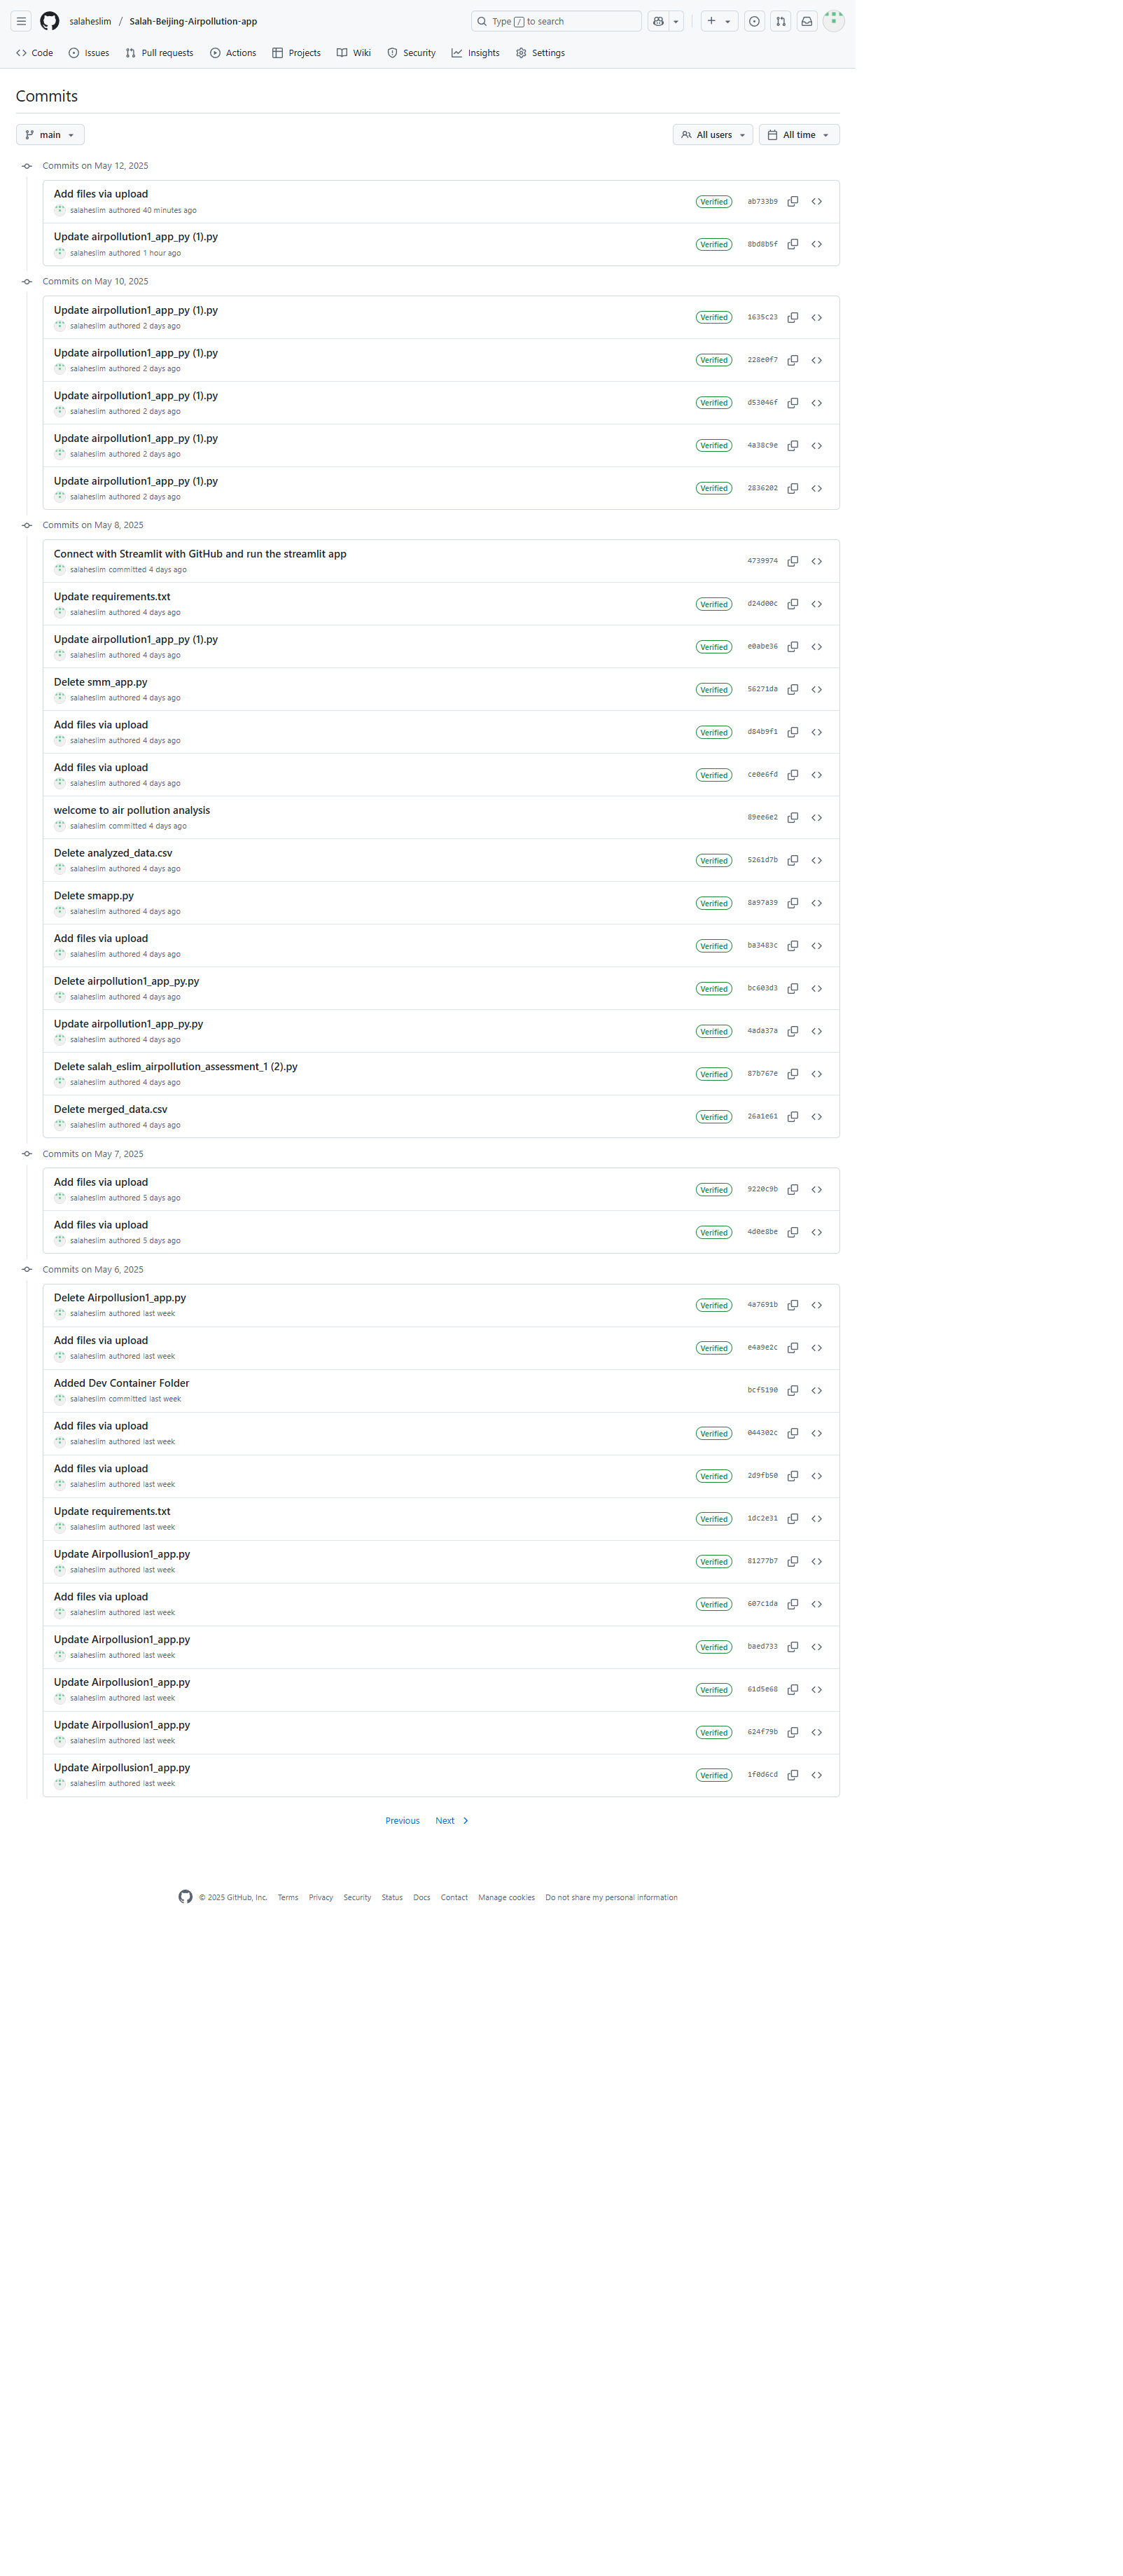

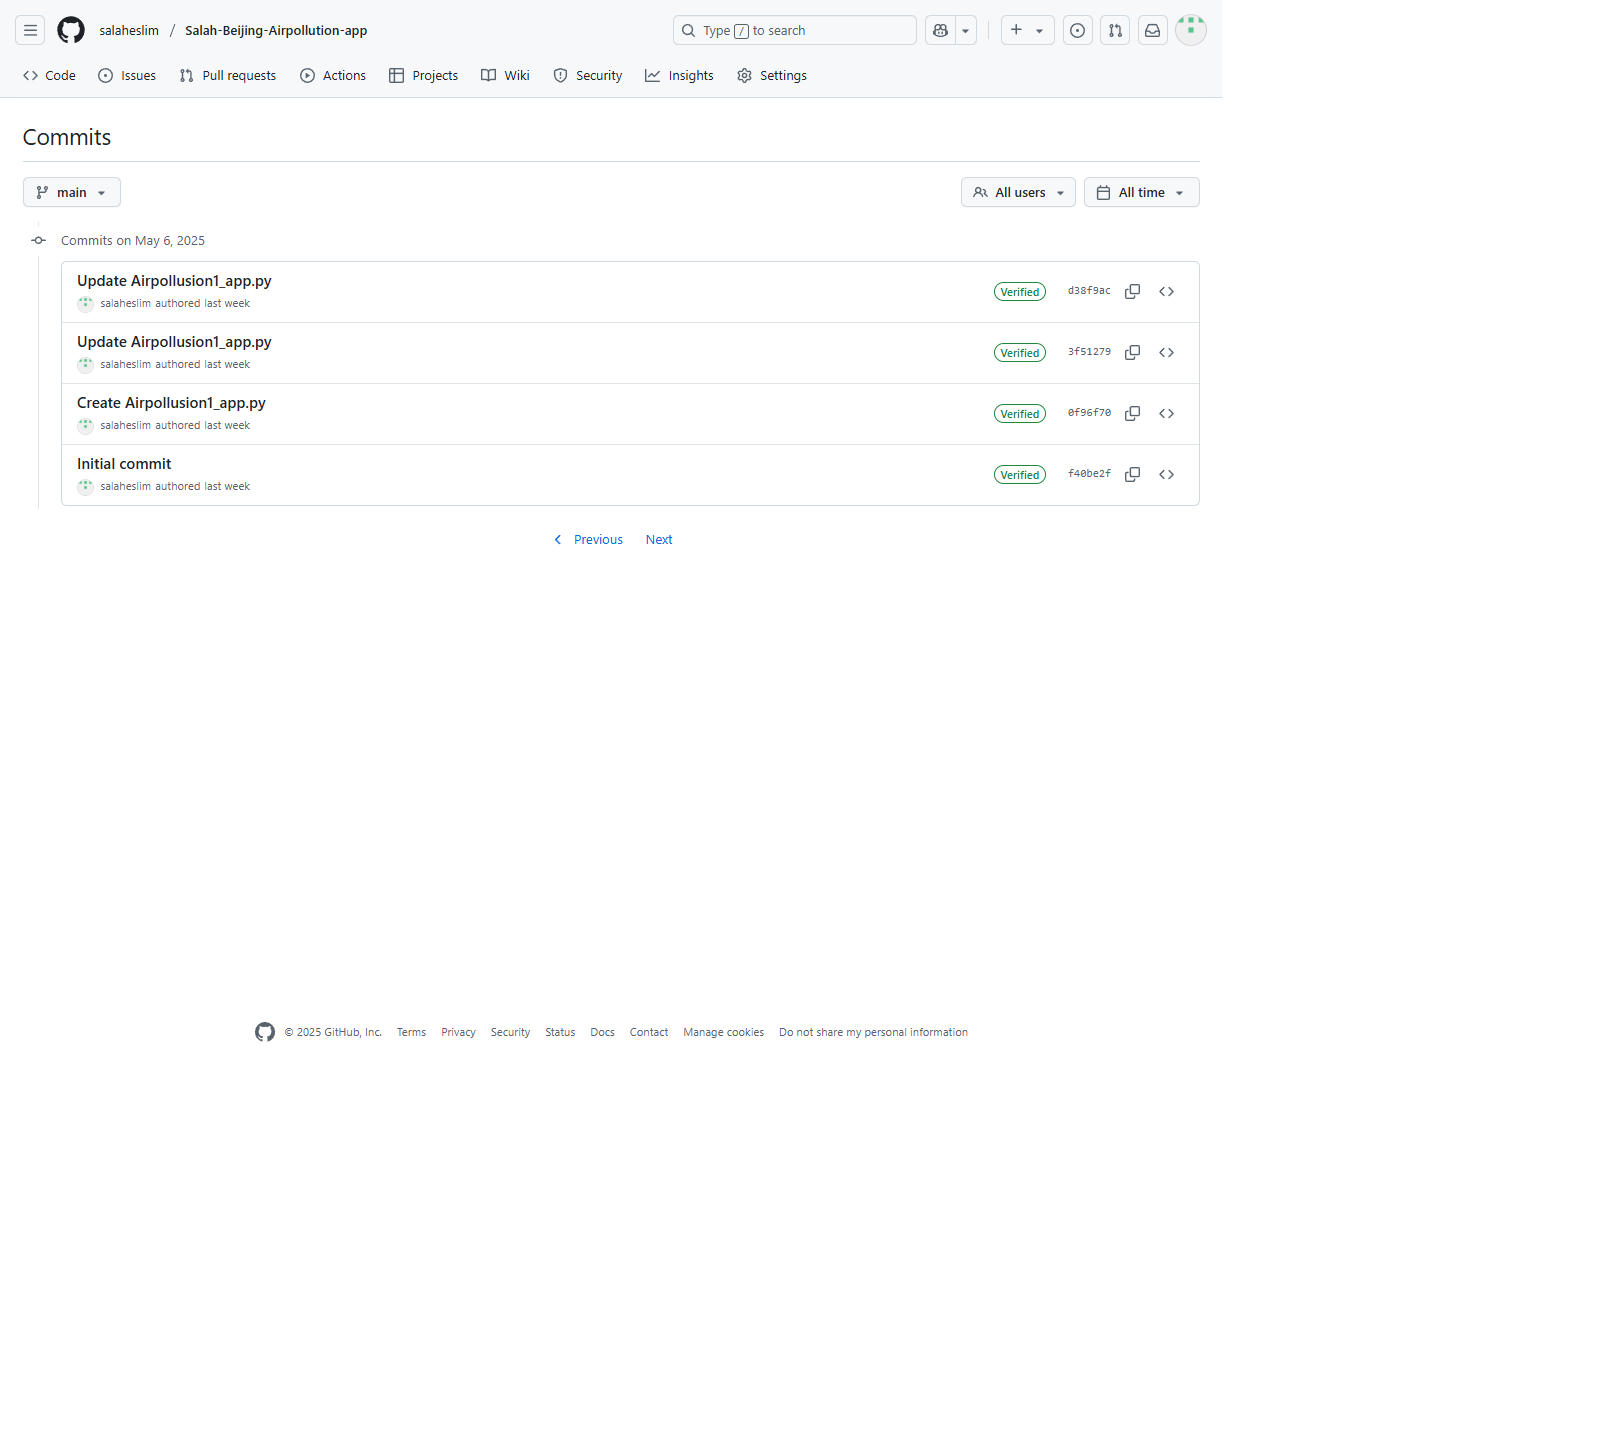

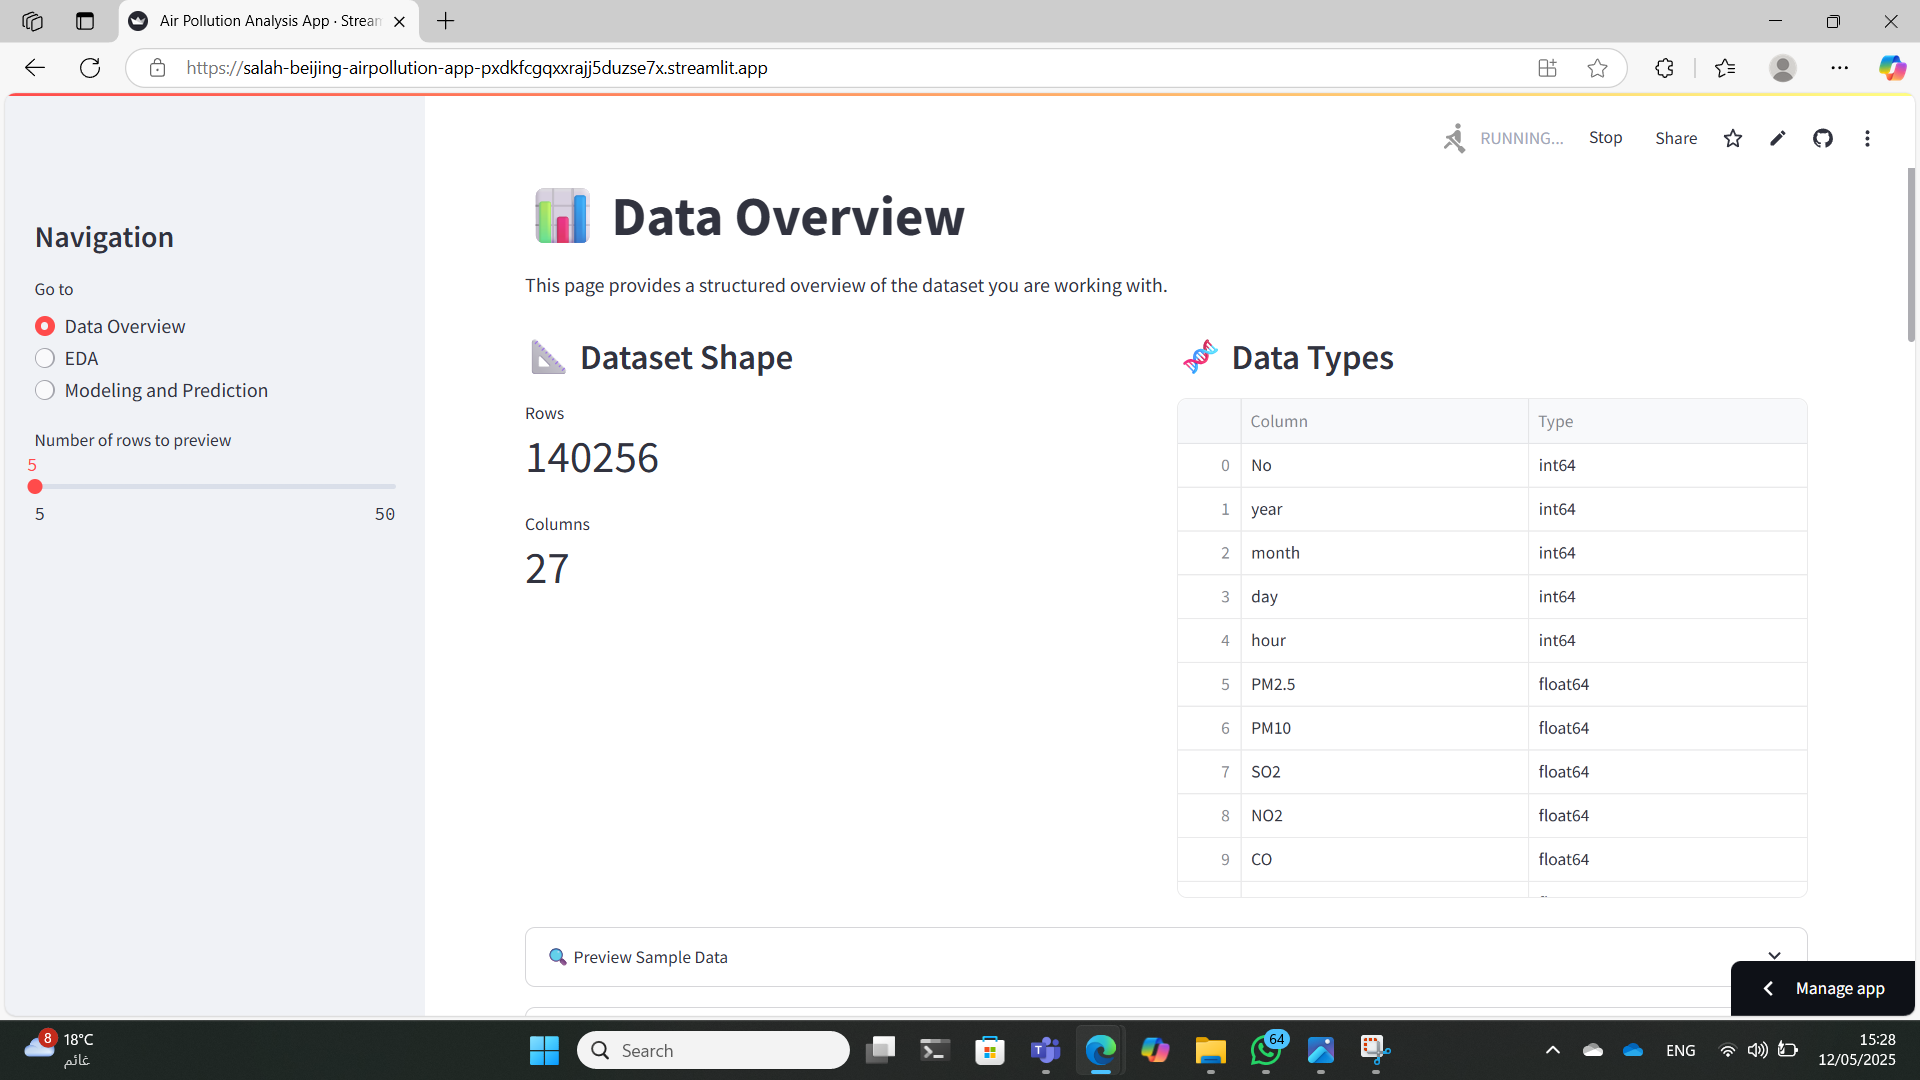

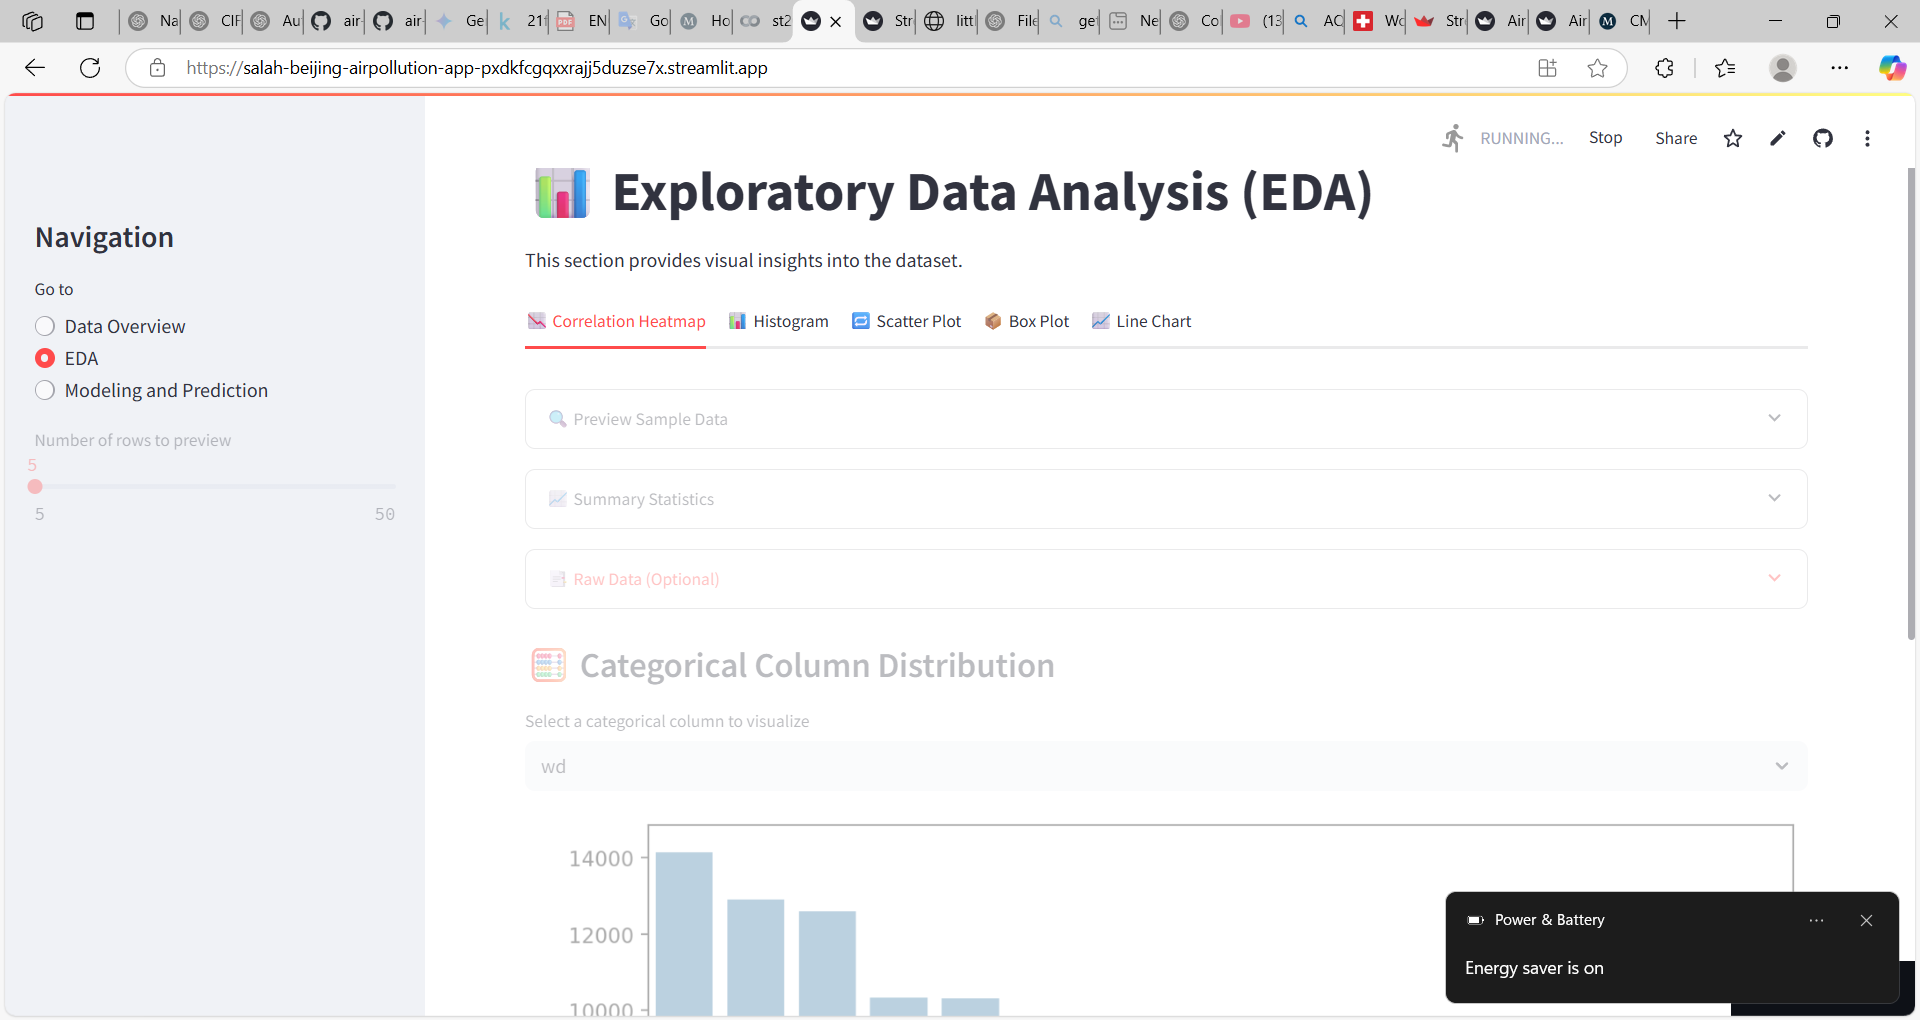

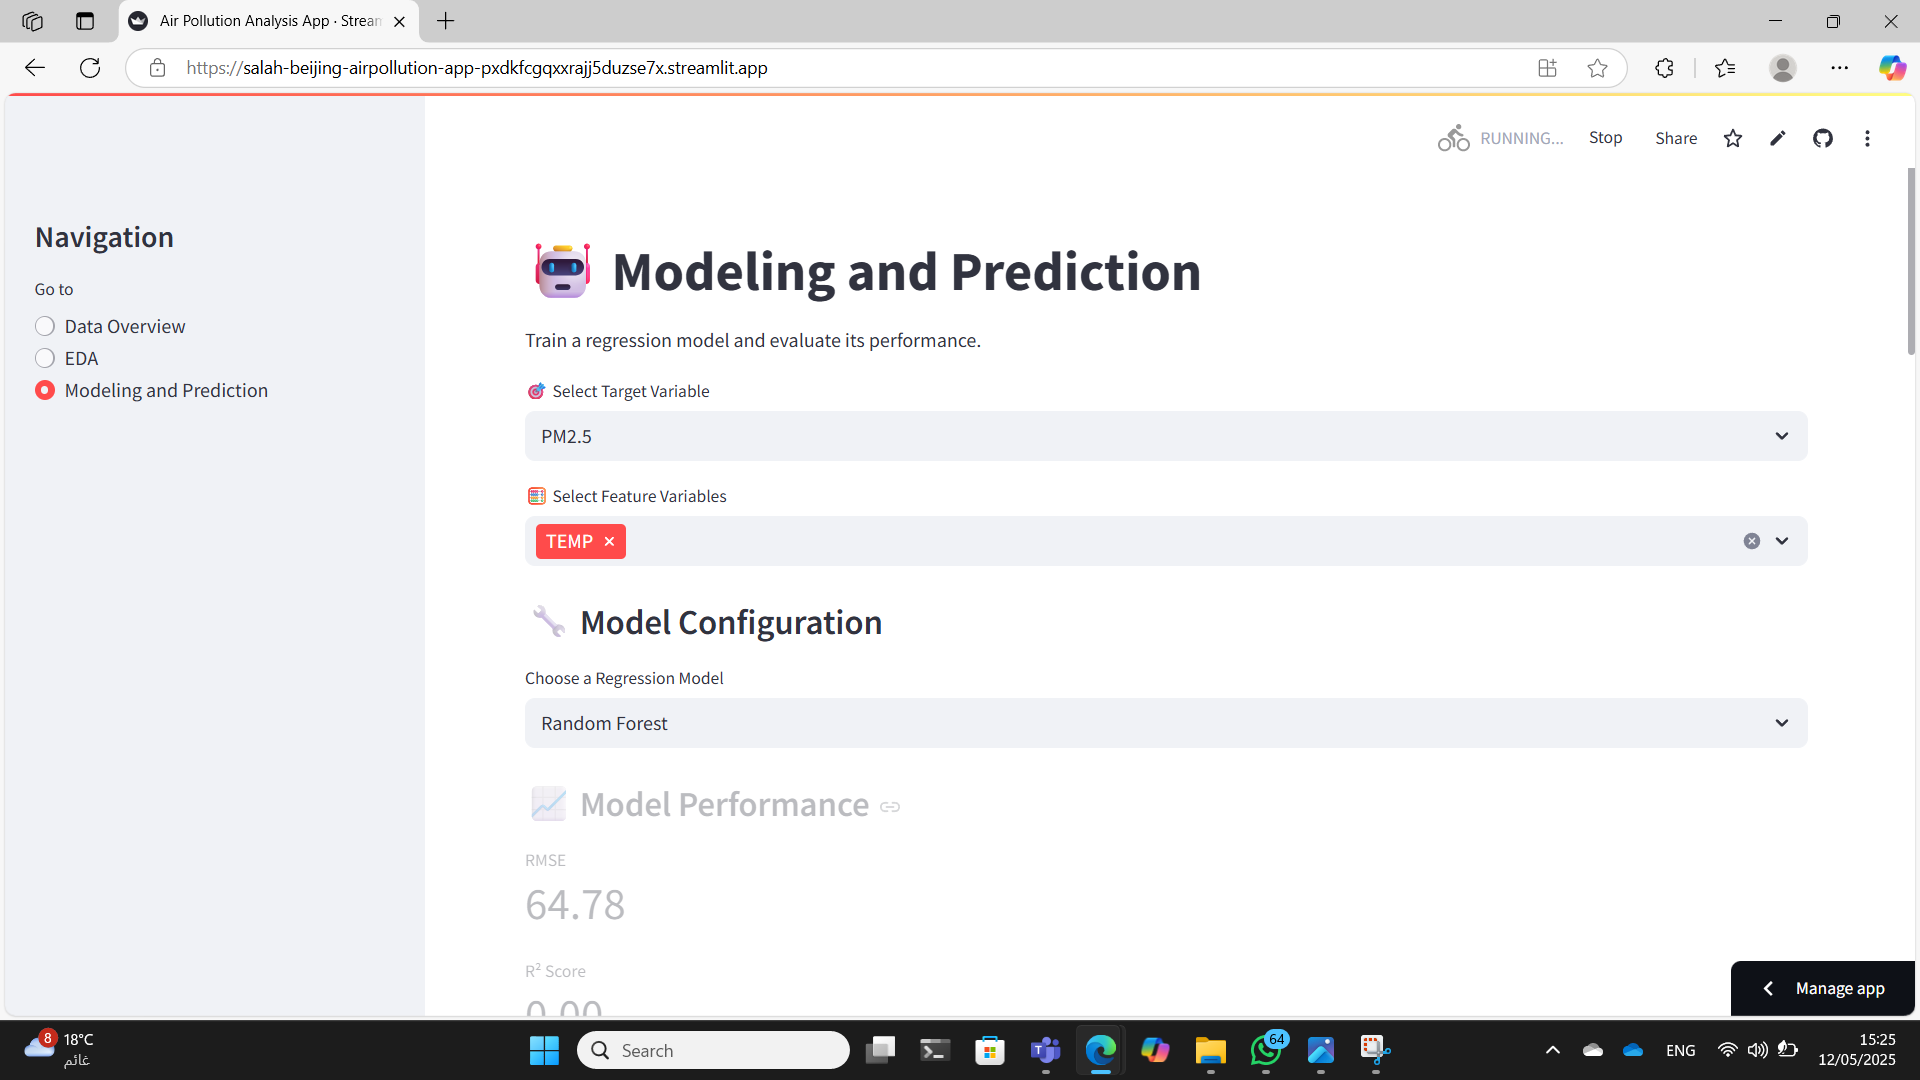